In [1]:
'''
Import python packages
'''
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import pacmap
from hdbscan import HDBSCAN
import shap
import pandas as pd
import numpy as np
shap.initjs()
from lightgbm import LGBMClassifier
from sklearn.model_selection import GridSearchCV

In [2]:
'''
Load data
'''
datafile = pd.read_csv('../../data/clean_RawData.csv')

# Check if 'INDEX' column exists and drop it if it does
if 'INDEX' in datafile.columns:
    datafile = datafile.drop('INDEX', axis=1)

print(datafile.head())

   Unnamed: 0    XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
0           1  0.271033  3649.739415  4451.320791  9.223142  32.392900   
1           2  0.270826  3653.341885  4488.640140  9.211980  32.501953   
2           3  0.270474  3688.113265  4432.832766  9.235690  32.402838   
3           4  0.272127  3651.680041  4459.268940  9.192009  31.876790   
4           5  0.270939  3636.329271  4460.409756  9.277992  32.424754   

      XMEAS6       XMEAS7     XMEAS8      XMEAS9  ...    XMEAS41       XMV1  \
0  47.559754  2798.975799  64.995825  122.898796  ...  43.985723  62.806984   
1  47.374855  2800.296214  65.091251  122.877519  ...  43.985723  62.819324   
2  47.817088  2802.647777  64.812363  122.916165  ...  43.985723  62.836835   
3  47.869249  2803.693084  64.205417  122.892493  ...  44.494201  62.848190   
4  47.509322  2804.787223  64.598623  122.890514  ...  44.494201  62.848341   

        XMV2       XMV3       XMV4       XMV6       XMV7       XMV8  \
0  53.286

In [3]:
datafile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1995 entries, 0 to 1994
Data columns (total 33 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1995 non-null   int64  
 1   XMEAS1      1995 non-null   float64
 2   XMEAS2      1995 non-null   float64
 3   XMEAS3      1995 non-null   float64
 4   XMEAS4      1995 non-null   float64
 5   XMEAS5      1995 non-null   float64
 6   XMEAS6      1995 non-null   float64
 7   XMEAS7      1995 non-null   float64
 8   XMEAS8      1995 non-null   float64
 9   XMEAS9      1995 non-null   float64
 10  XMEAS10     1995 non-null   float64
 11  XMEAS11     1995 non-null   float64
 12  XMEAS12     1995 non-null   float64
 13  XMEAS13     1995 non-null   float64
 14  XMEAS14     1995 non-null   float64
 15  XMEAS15     1995 non-null   float64
 16  XMEAS16     1995 non-null   float64
 17  XMEAS17     1995 non-null   float64
 18  XMEAS18     1995 non-null   float64
 19  XMEAS19     1995 non-null  

In [4]:
# Drop unnecessary columns
datafile = datafile.drop(columns=['Unnamed: 0'])
datafile

,XMEAS1,XMEAS2,XMEAS3,XMEAS4,XMEAS5,XMEAS6,XMEAS7,XMEAS8,XMEAS9,XMEAS10,...,XMEAS41,XMV1,XMV2,XMV3,XMV4,XMV6,XMV7,XMV8,XMV10,XMV11
0,0.271033,3649.739415,4451.320791,9.223142,32.392900,47.559754,2798.975799,64.995825,122.898796,0.197826,...,43.985723,62.806984,53.286709,26.662173,60.482854,24.229301,37.208198,46.430526,35.865322,12.930642
1,0.270826,3653.341885,4488.640140,9.211980,32.501953,47.374855,2800.296214,65.091251,122.877519,0.196092,...,43.985723,62.819324,53.220324,26.689544,60.524644,24.171763,37.227431,46.427192,35.719177,11.714423
2,0.270474,3688.113265,4432.832766,9.235690,32.402838,47.817088,2802.647777,64.812363,122.916165,0.204023,...,43.985723,62.836835,53.211797,26.705507,60.546193,25.179022,37.243766,46.442544,35.740715,10.734676
3,0.272127,3651.680041,4459.268940,9.192009,31.876790,47.869249,2803.693084,64.205417,122.892493,0.220561,...,44.494201,62.848190,53.186885,26.768653,60.568588,26.922729,37.211698,46.407497,35.736154,10.311783
4,0.270939,3636.329271,4460.409756,9.277992,32.424754,47.509322,2804.787223,64.598623,122.890514,0.236146,...,44.494201,62.848341,53.192271,26.396773,60.637598,29.039605,37.199517,46.424034,35.890716,11.181380
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1990,-0.001158,3744.190299,4863.374473,8.792891,24.901362,40.390117,2903.201084,66.243082,122.882878,0.648268,...,38.657276,64.952528,58.216951,100.000000,57.399858,100.000000,41.244686,45.466296,30.171207,22.898173
1991,-0.001147,3798.451896,4864.787808,8.814539,24.783557,40.401312,2911.912112,68.055534,122.881328,0.646405,...,38.657276,65.082318,58.350766,100.000000,57.365210,100.000000,41.463254,45.413515,30.066018,26.035429
1992,-0.000370,3774.038558,4891.309364,8.659021,24.805757,40.107094,2922.391028,67.415723,122.888396,0.641291,...,37.762790,65.217638,58.502281,100.000000,57.415508,100.000000,41.700081,45.373462,30.117846,25.214501
1993,-0.000925,3812.197101,4909.631048,8.724842,24.877275,40.463346,2931.150717,67.685917,122.890874,0.645821,...,37.762790,65.376526,58.648112,100.000000,57.280676,100.000000,41.954073,45.361655,29.900523,25.175145


In [14]:
# Handle missing values (if any)
datafile.fillna(datafile.mean(), inplace=True)

In [15]:
# Separate predictors (X)
#X = datafile.drop(columns=['XMEAS1']).values
X = datafile
# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [16]:
from sklearn.preprocessing import RobustScaler
# Robust scaling
scaler1 = RobustScaler()
X_scaled1 = scaler1.fit_transform(X)

In [17]:
from sklearn.preprocessing import MinMaxScaler

# Min-max scaling
scaler2 = MinMaxScaler()
X_scaled2 = scaler2.fit_transform(X)

In [19]:
# Apply PCA for dimensionality reduction
pca = PCA(n_components=3)  # Adjust the number of components based on your needs
X_pca = pca.fit_transform(X_scaled1)

In [20]:
dataframe = pd.DataFrame(X_pca)
dataframe

,0,1,2
0,4.177674,-0.736597,0.247972
1,4.990405,-0.600394,0.297544
2,5.875168,-0.661970,-0.136691
3,6.437013,-0.854106,0.531316
4,6.942742,-1.111373,0.393557
...,...,...,...
1990,59.722600,46.911785,3.570518
1991,63.792608,48.008190,3.110201
1992,69.188565,48.390558,2.986121
1993,73.419538,49.538325,2.403351


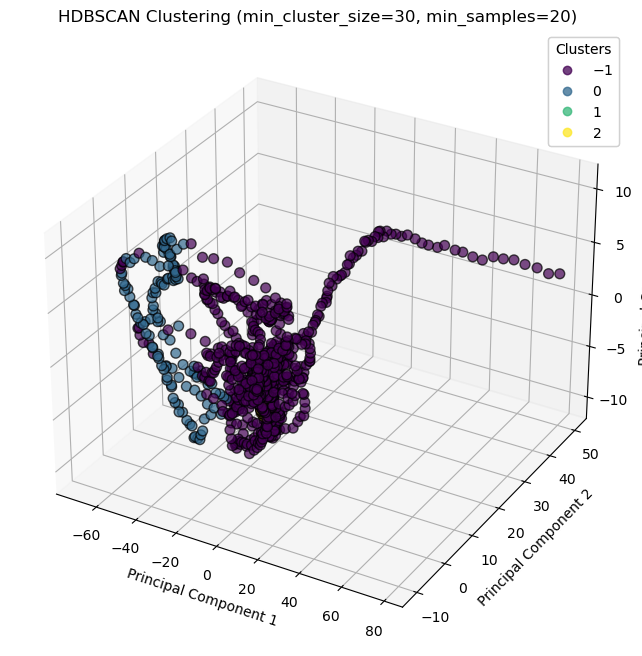

In [21]:
min_cluster_size = 30
min_samples = 20

clusterer = HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples)

# Fit the model and obtain cluster labels
cluster_labels = clusterer.fit_predict(dataframe)

# Visualize the clustering results in 3D
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

scatter = ax.scatter(dataframe[0], dataframe[1], dataframe[2], c=cluster_labels, cmap='viridis', s=50, edgecolors='k', alpha=0.7)

ax.set_xlabel('Principal Component 1')
ax.set_ylabel('Principal Component 2')
ax.set_zlabel('Principal Component 3')
ax.set_title(f'HDBSCAN Clustering (min_cluster_size={min_cluster_size}, min_samples={min_samples})')

legend1 = ax.legend(*scatter.legend_elements(), title='Clusters')
ax.add_artist(legend1)

plt.show()

In [9]:
# Apply HDBSCAN clustering
clusterer = HDBSCAN(min_cluster_size=30, min_samples=20)
cluster_labels = clusterer.fit_predict(X_pca)

Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


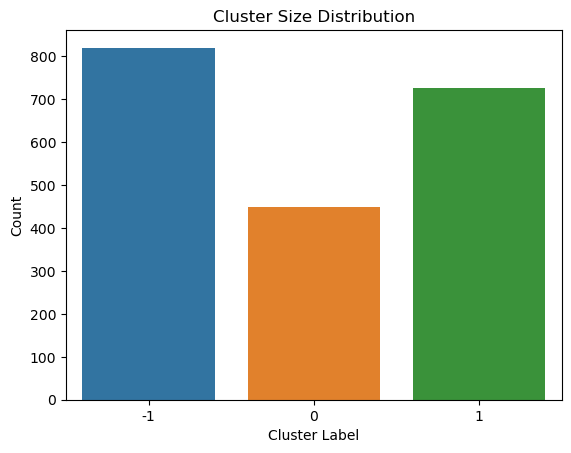

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plotting cluster size distribution
sns.countplot(cluster_labels)
plt.title('Cluster Size Distribution')
plt.xlabel('Cluster Label')
plt.ylabel('Count')
plt.show()

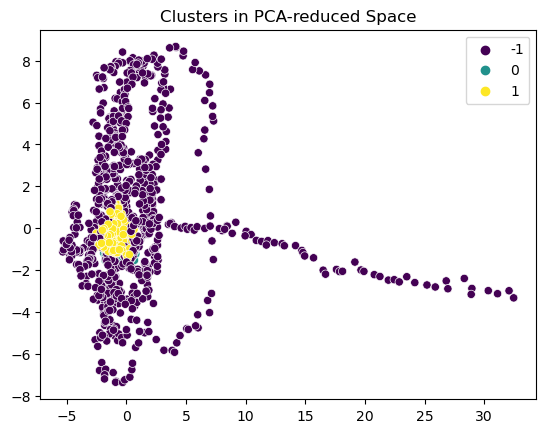

In [11]:
# Scatter plot of clusters in PCA-reduced space
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clusters in PCA-reduced Space')
plt.show()

In [11]:
# Add cluster labels to the original DataFrame
datafile['Cluster_Labels'] = cluster_labels

# Calculate mean values for each feature within each cluster
cluster_means = datafile.groupby('Cluster_Labels').mean()

# Display cluster characteristics
print(cluster_means)

                  XMEAS1       XMEAS2       XMEAS3    XMEAS4     XMEAS5  \
Cluster_Labels                                                            
-1              0.245645  3662.474683  4458.322939  9.246741  31.924987   
 0              0.259649  3657.198362  4439.132550  9.242252  32.408271   
 1              0.304957  3670.925540  4499.375294  9.353725  32.651018   

                   XMEAS6       XMEAS7     XMEAS8      XMEAS9   XMEAS10  ...  \
Cluster_Labels                                                           ...   
-1              47.134748  2781.249987  65.038810  122.898631  0.246554  ...   
 0              47.605117  2799.974349  64.955074  122.899770  0.214518  ...   
 1              47.984019  2799.995683  64.925463  122.899802  0.398949  ...   

                     XMV3       XMV4  XMV5       XMV6       XMV7       XMV8  \
Cluster_Labels                                                                
-1              30.750777  60.637969   0.0  31.058187  37.350707 

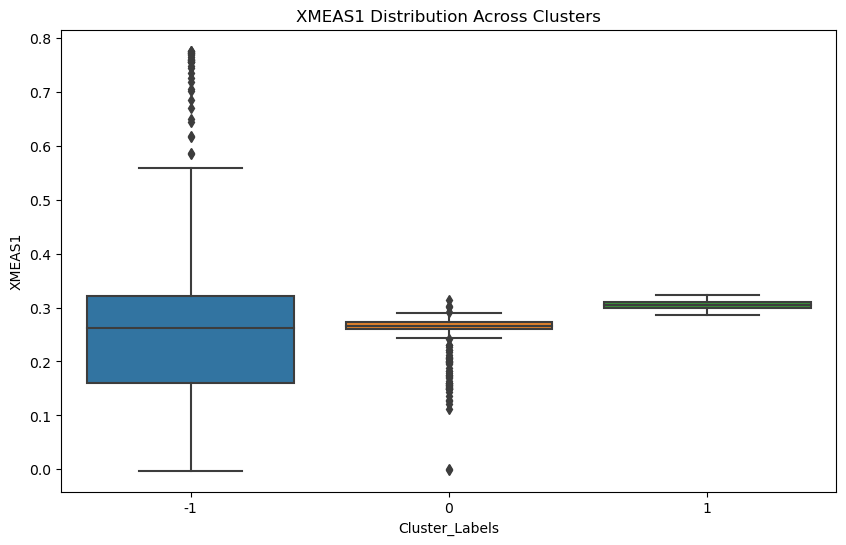

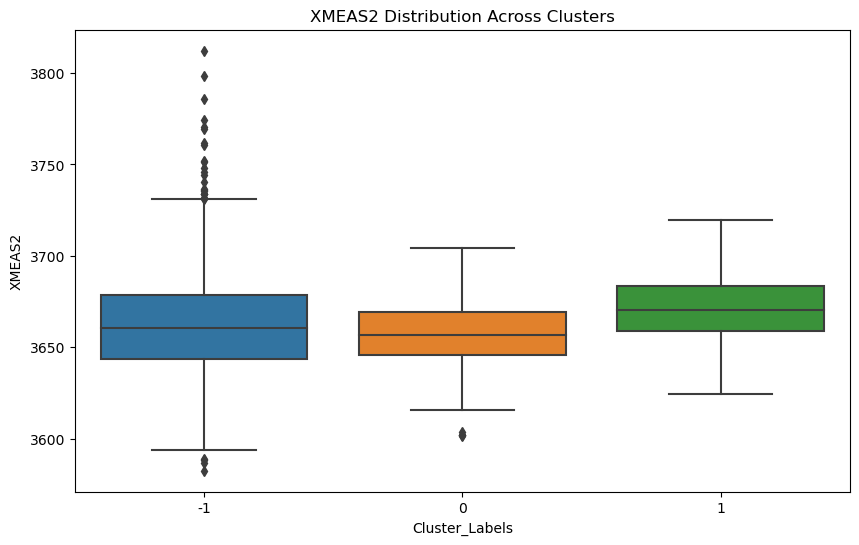

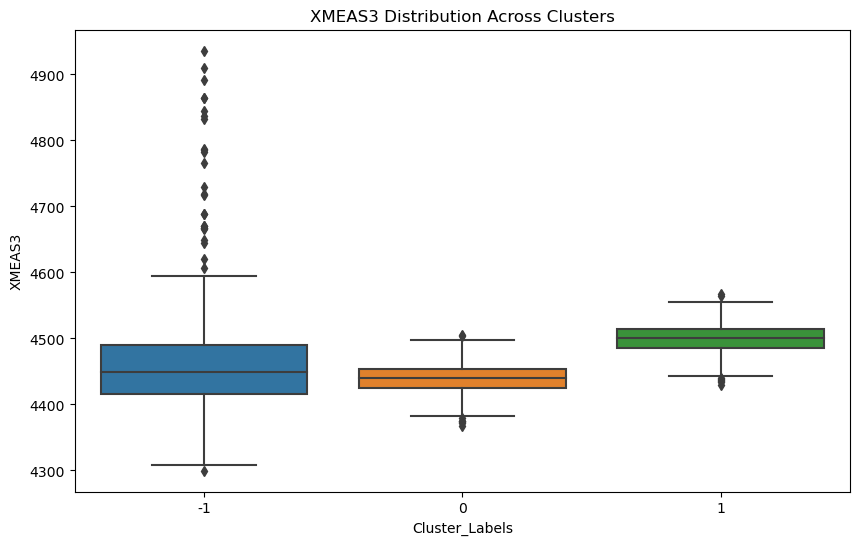

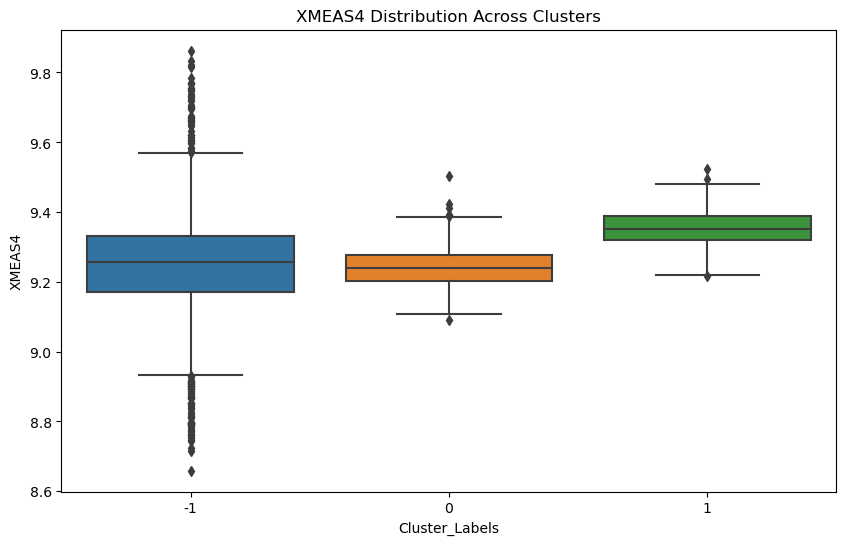

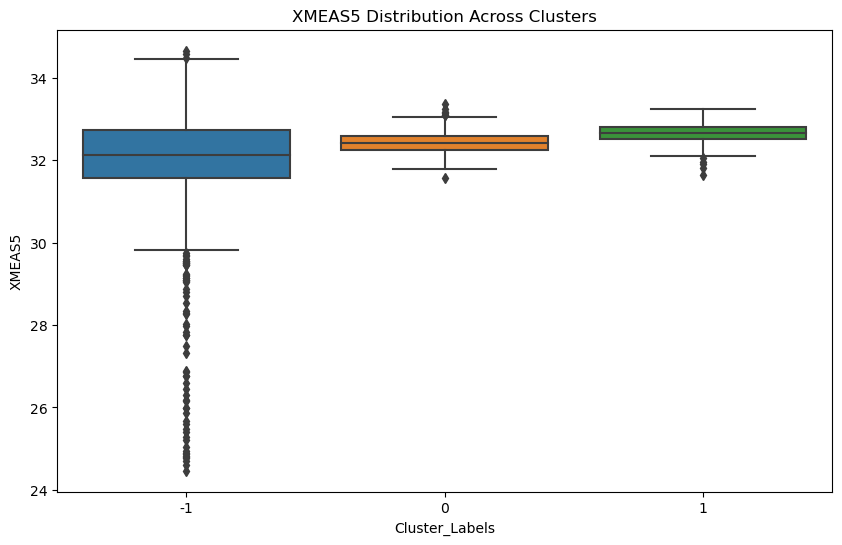

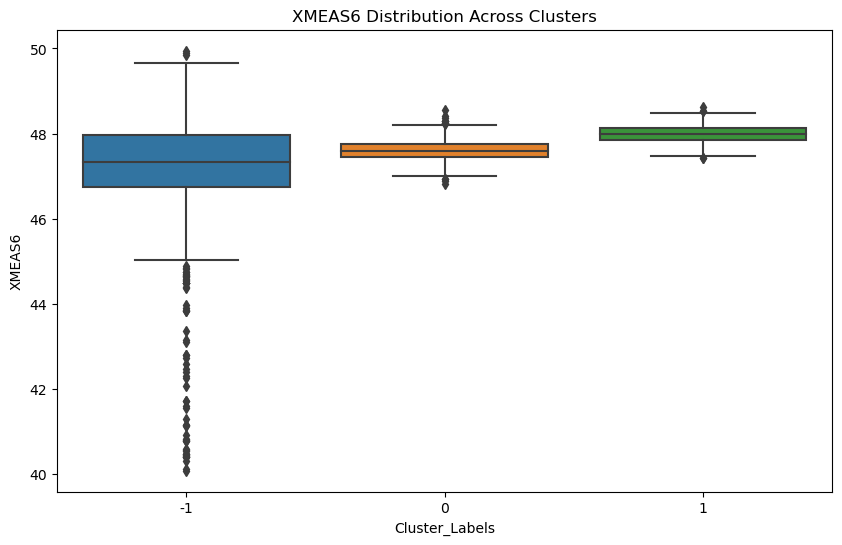

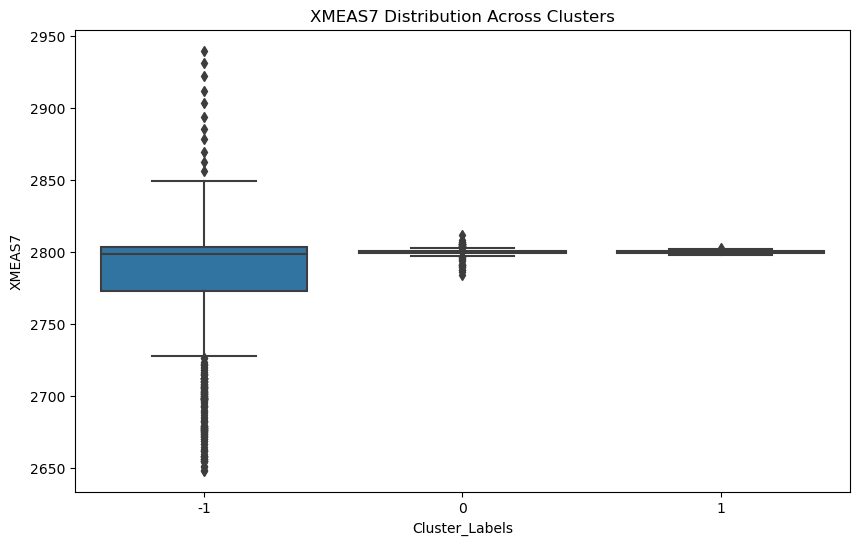

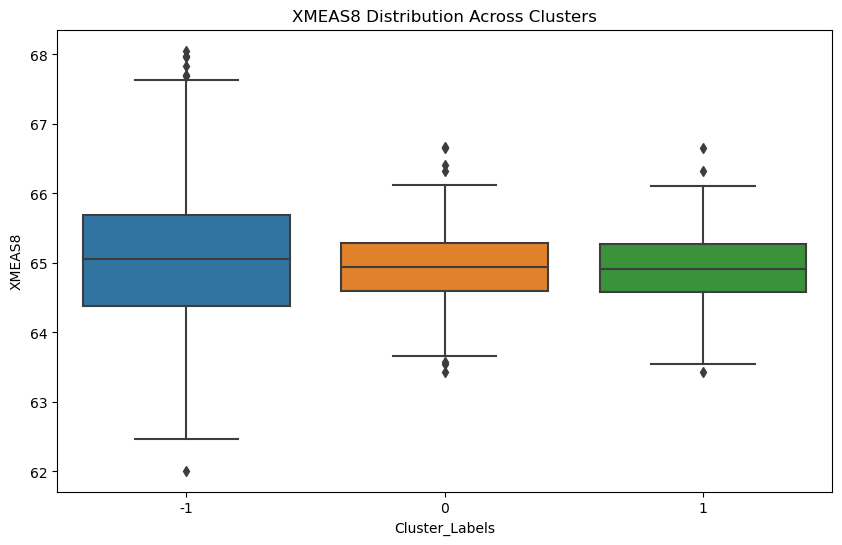

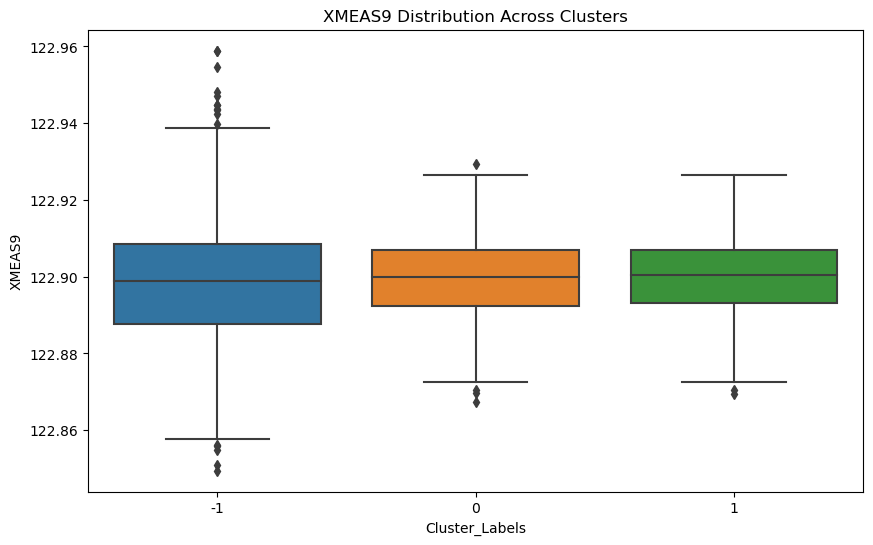

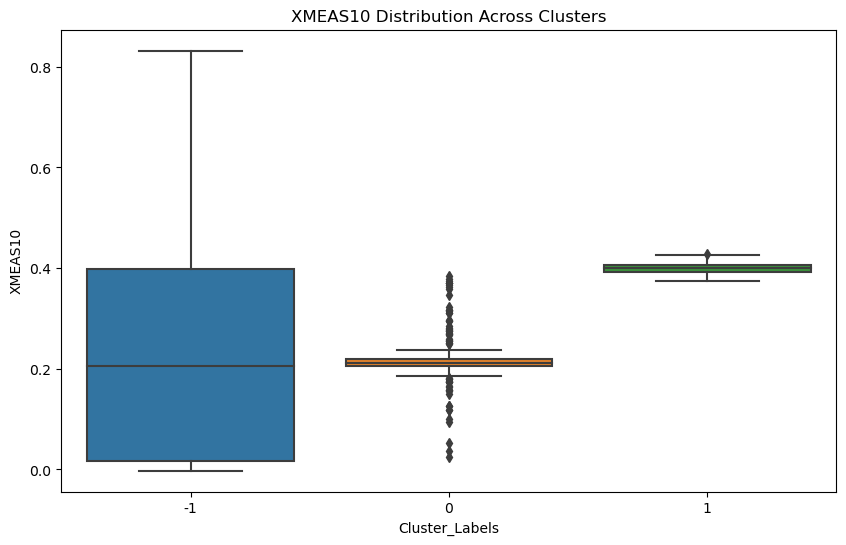

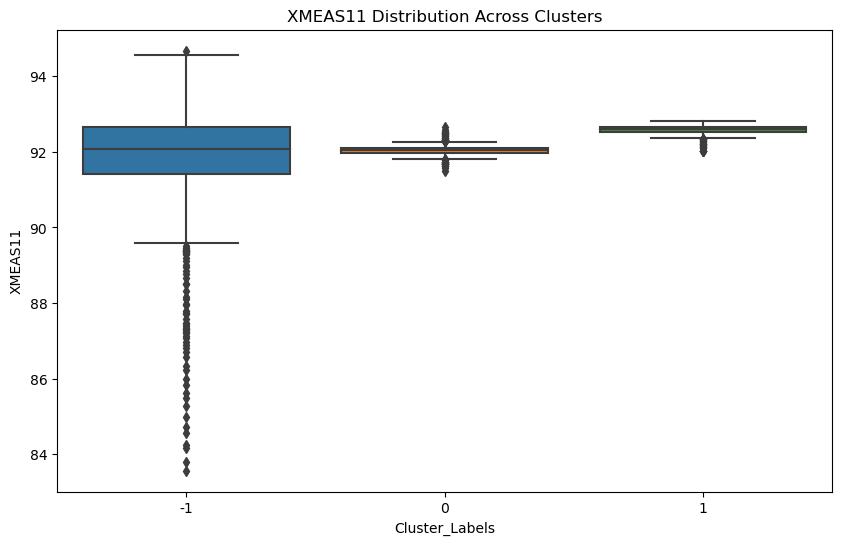

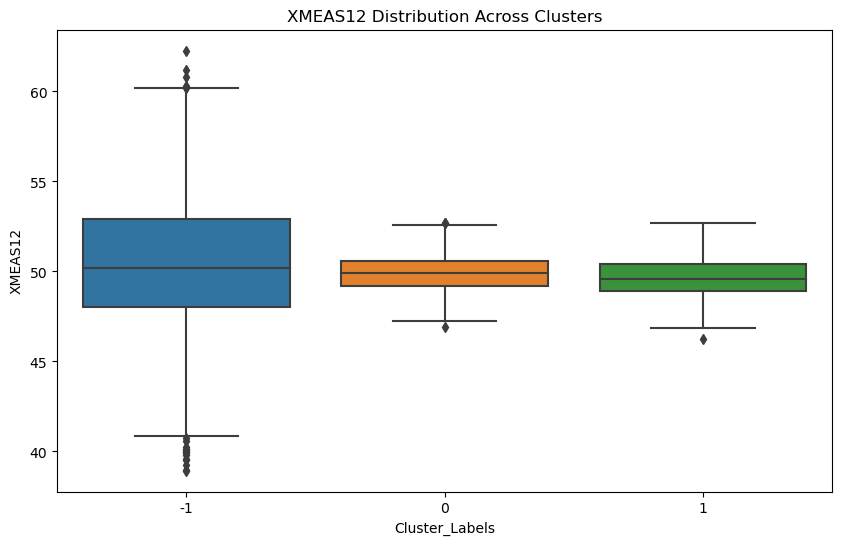

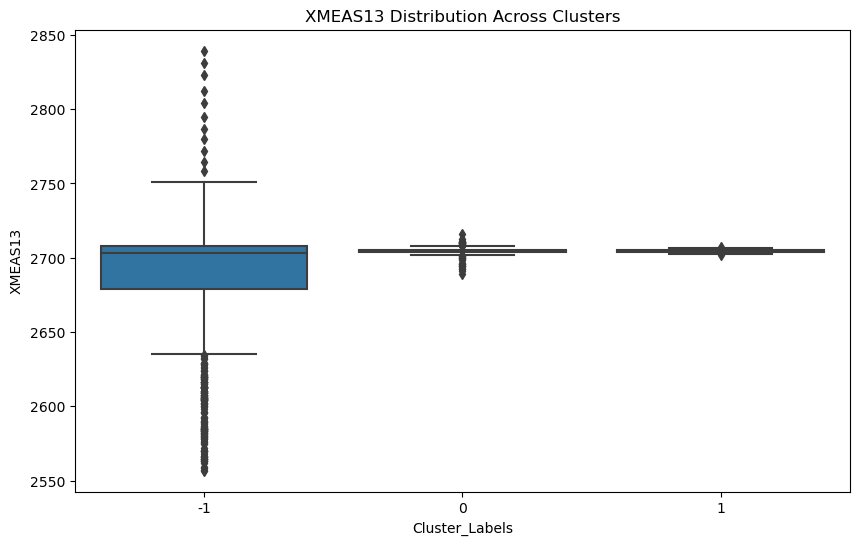

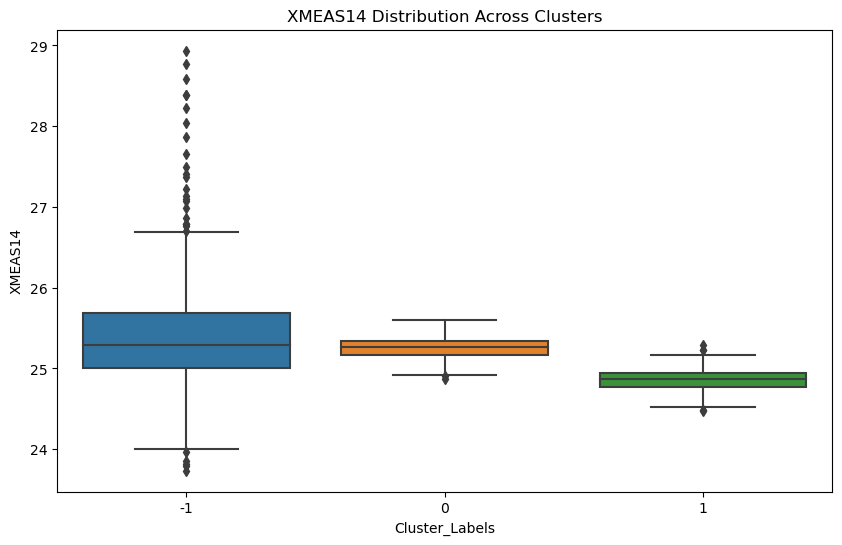

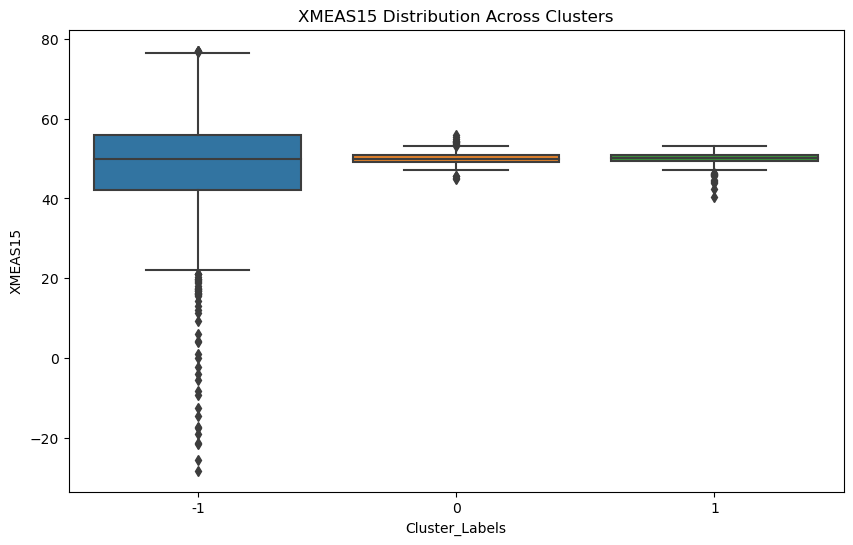

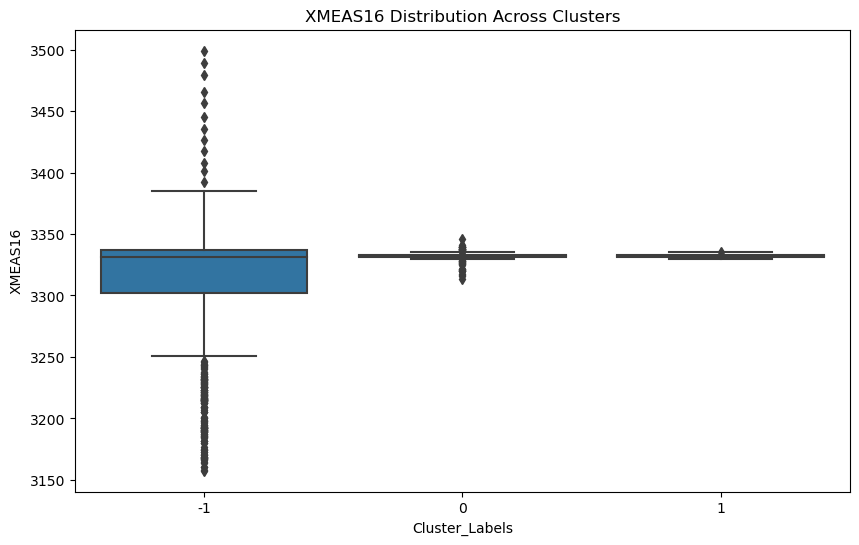

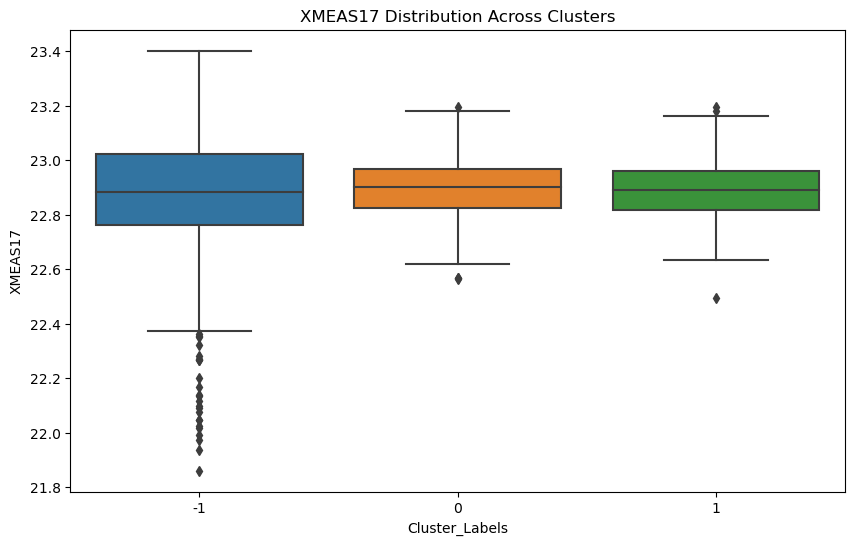

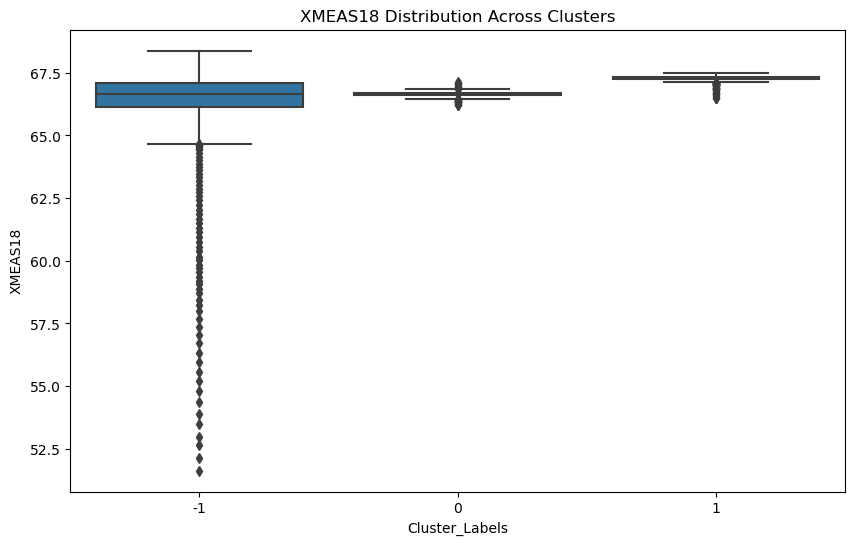

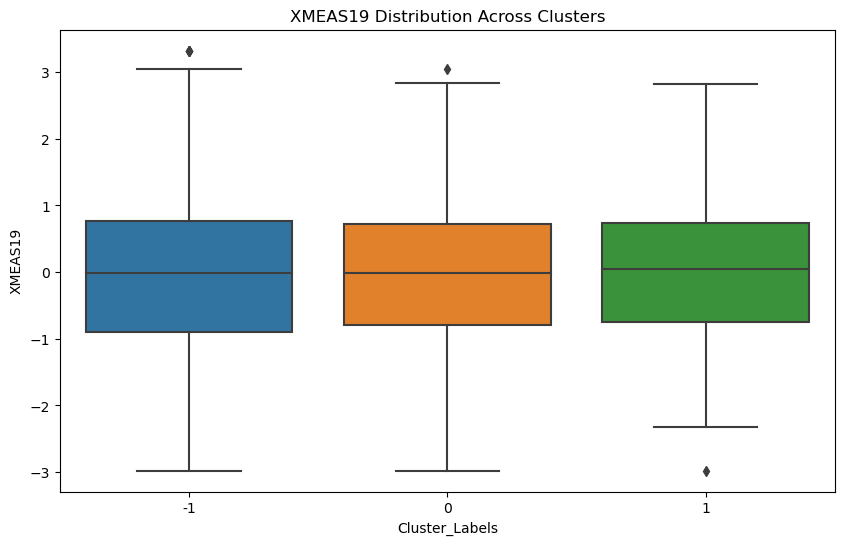

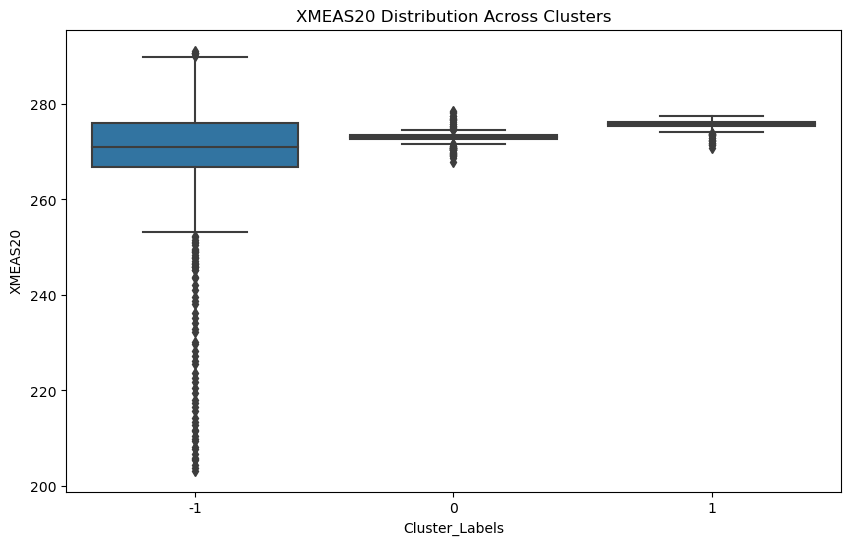

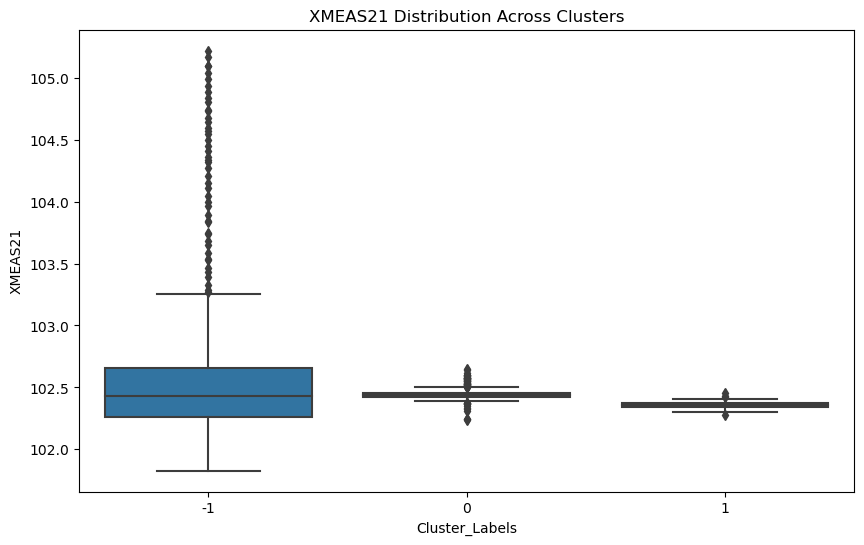

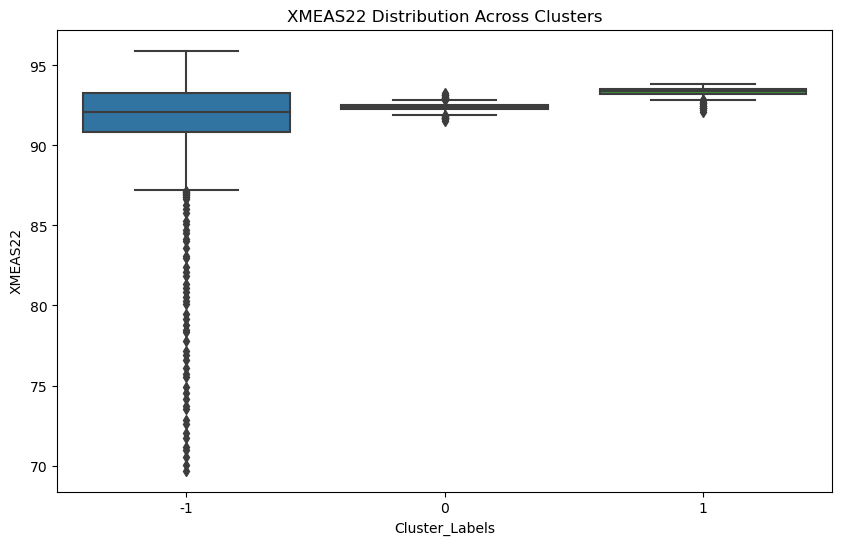

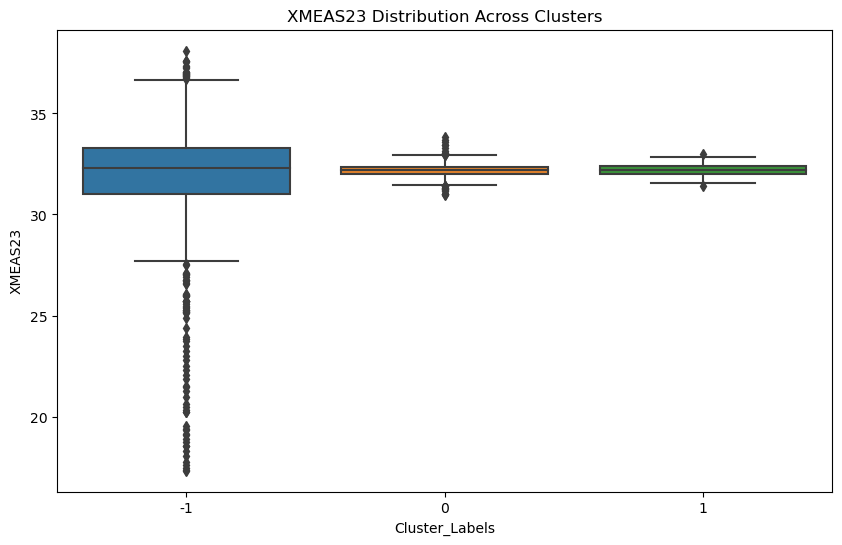

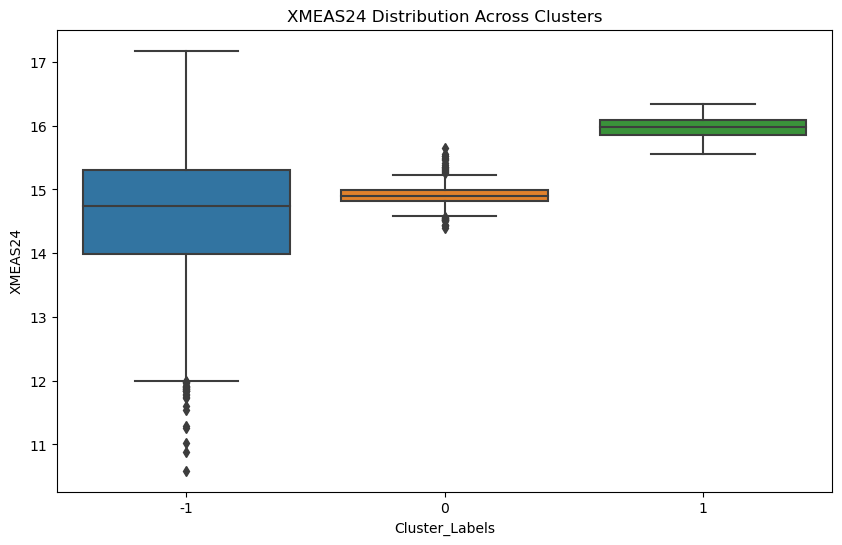

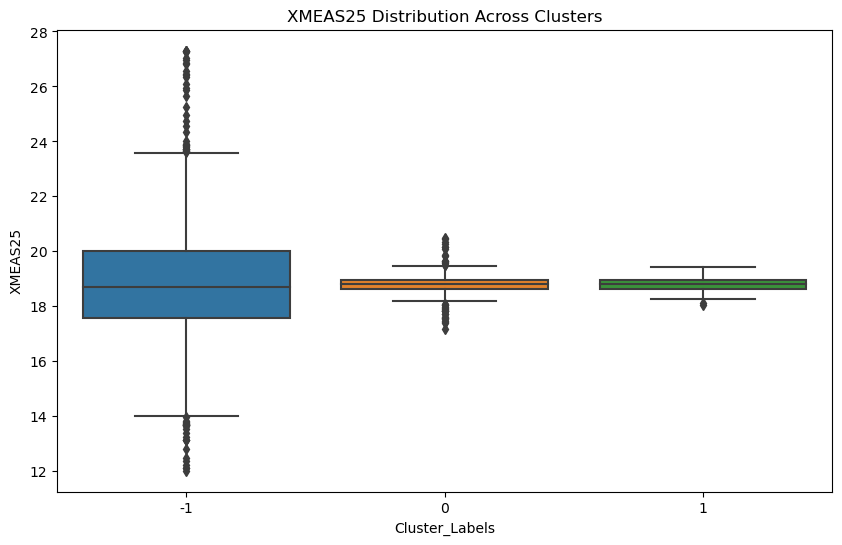

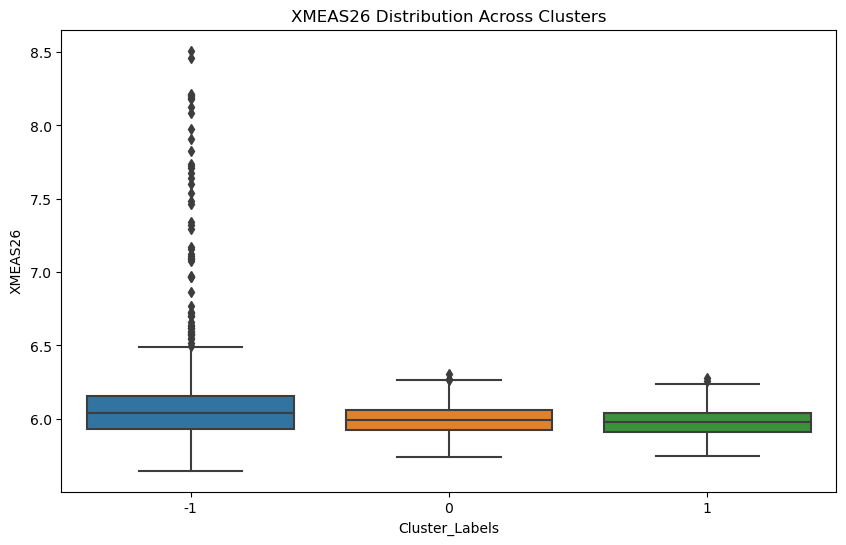

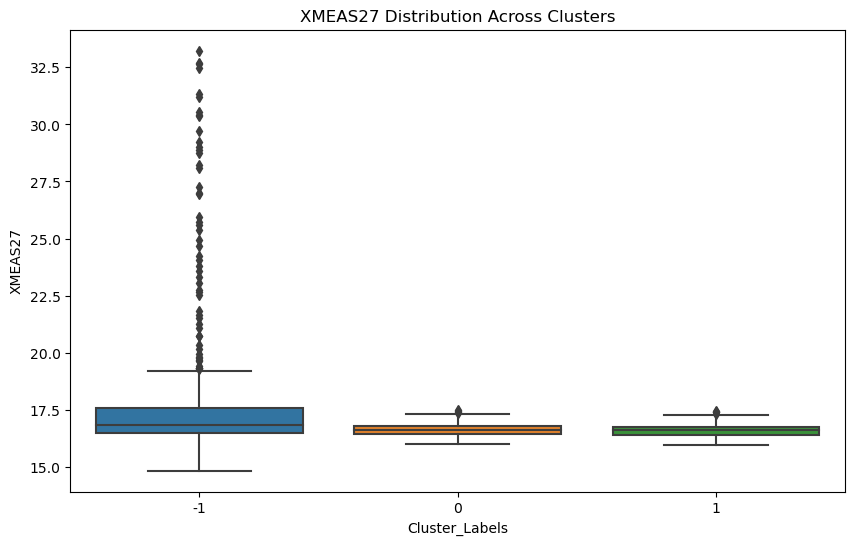

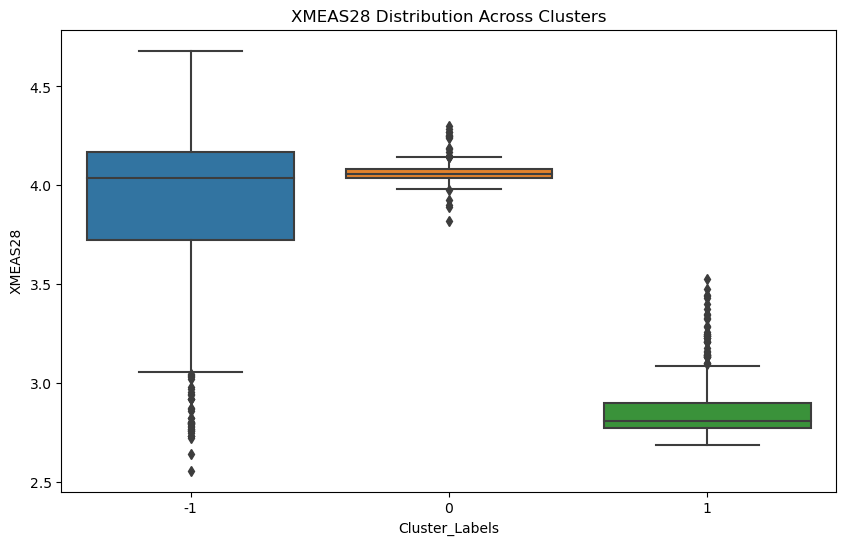

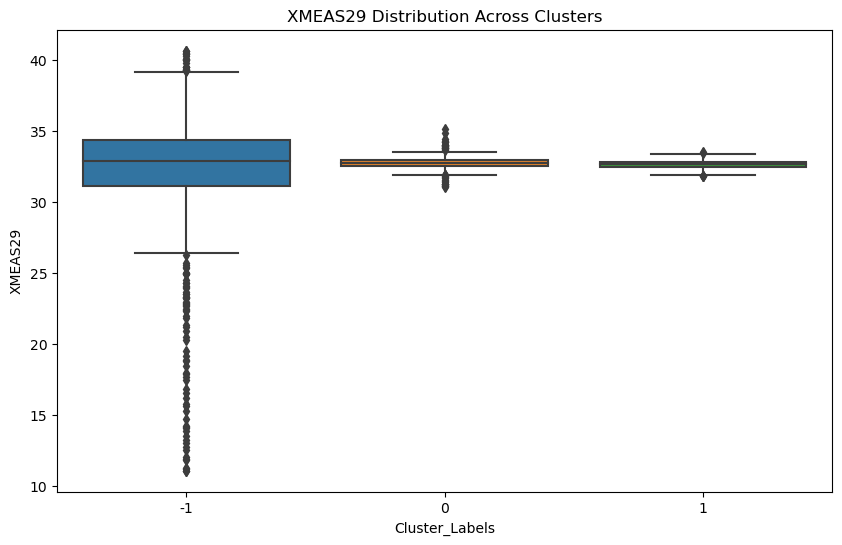

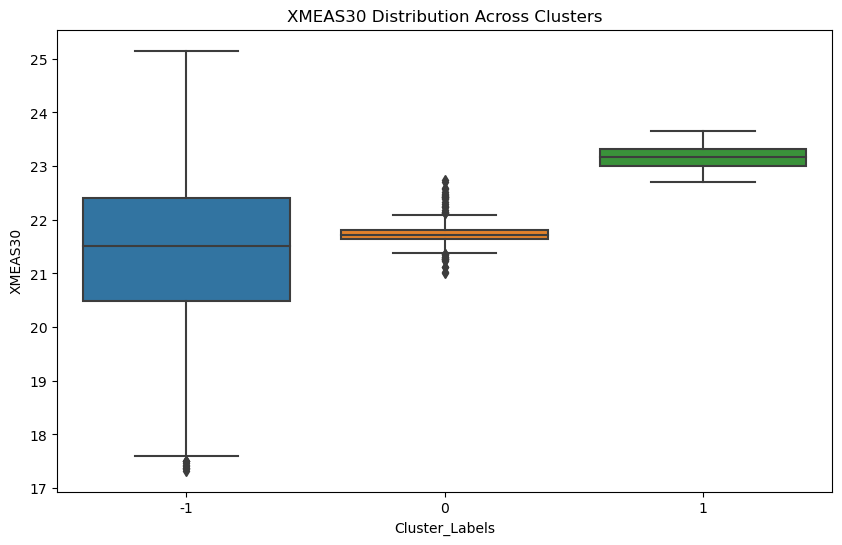

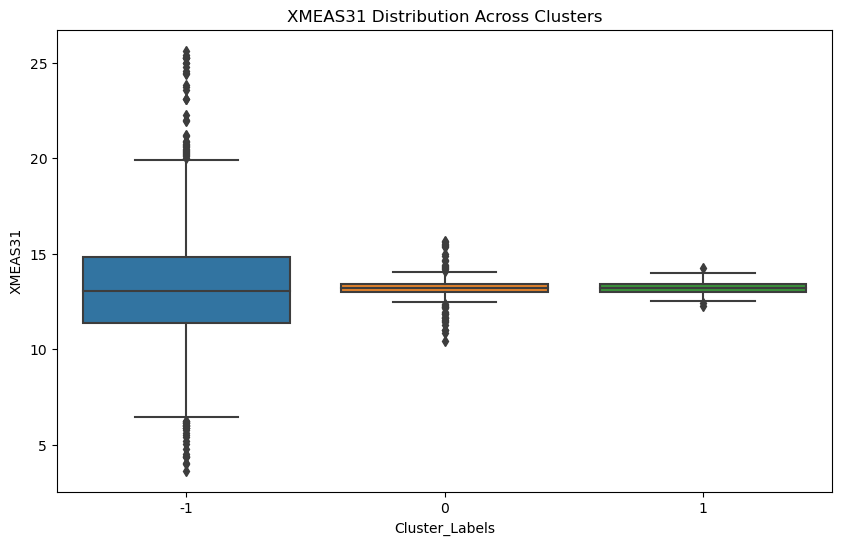

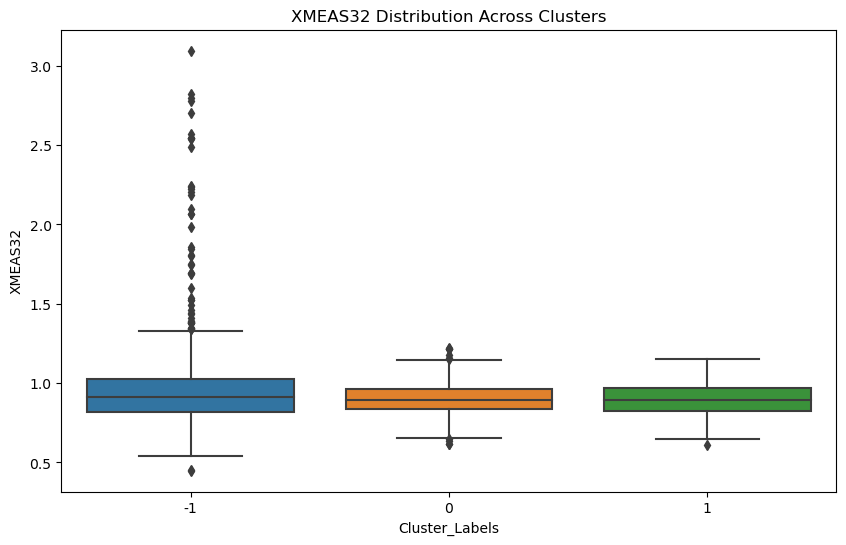

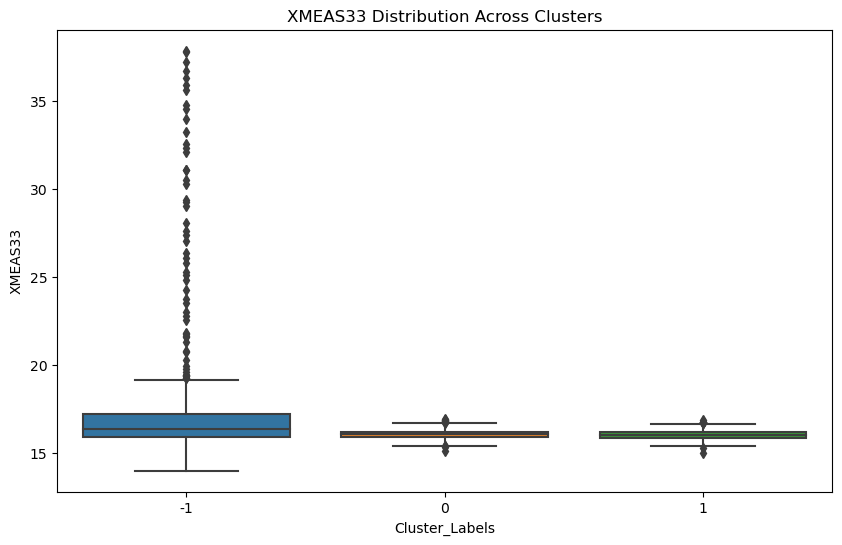

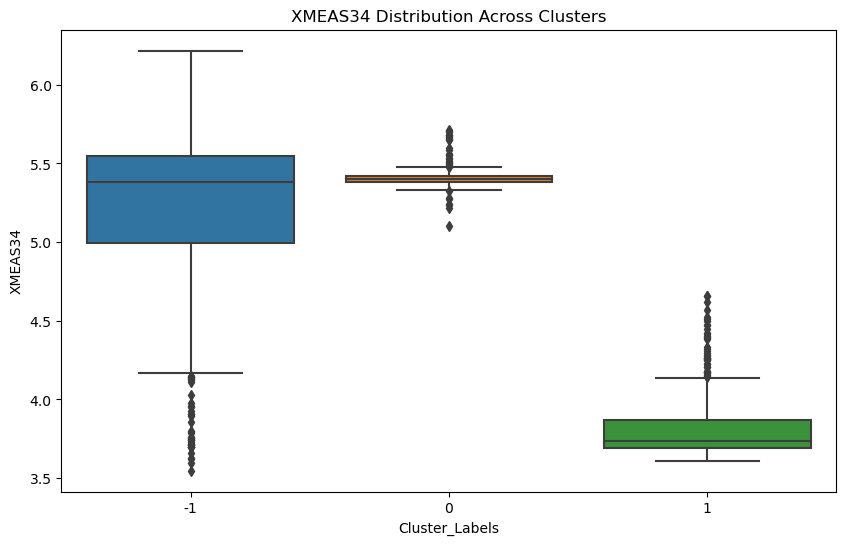

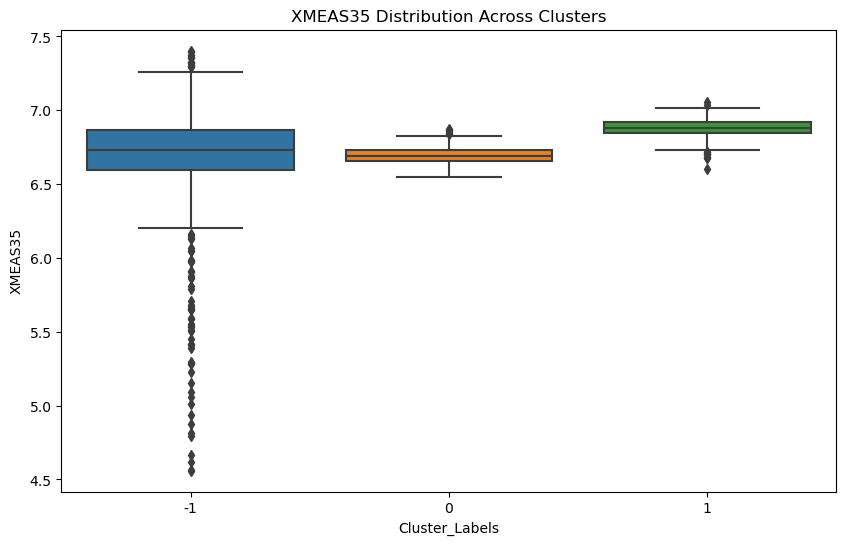

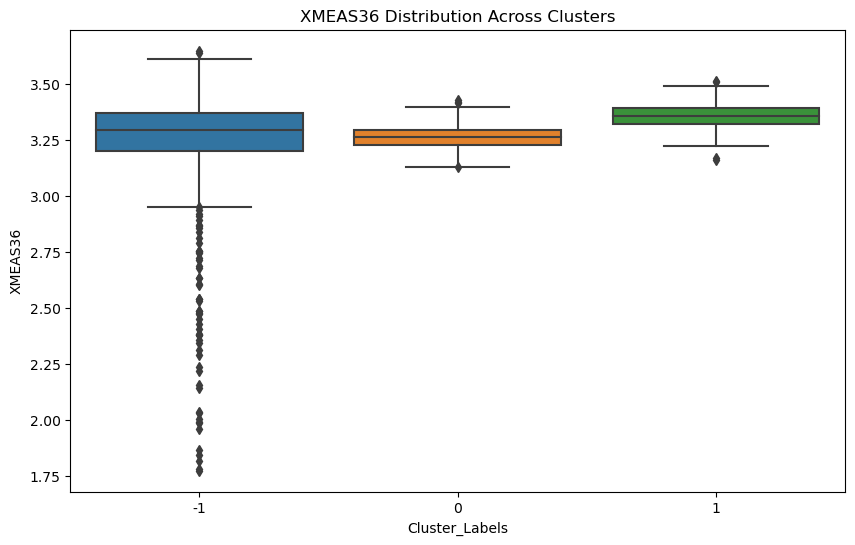

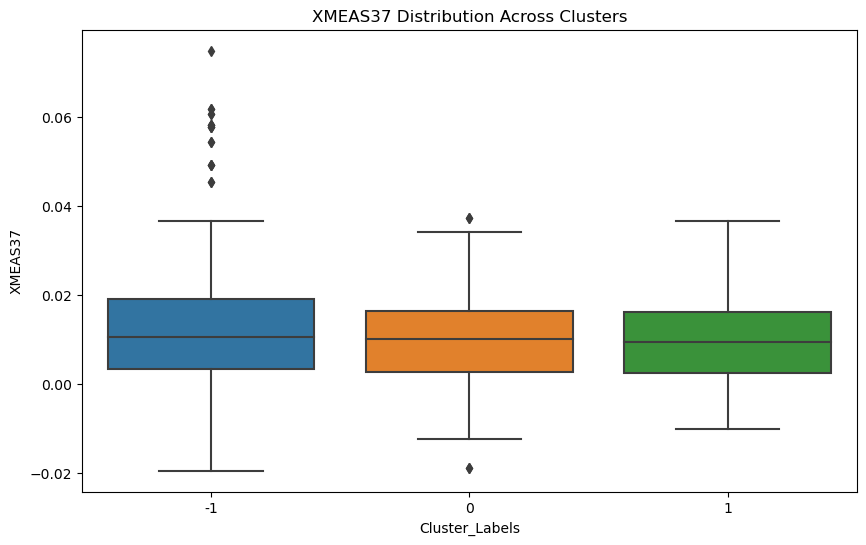

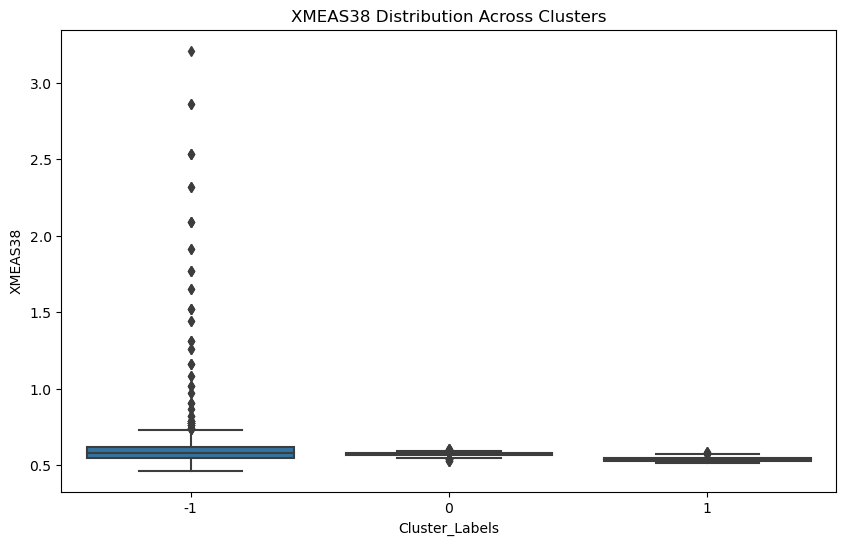

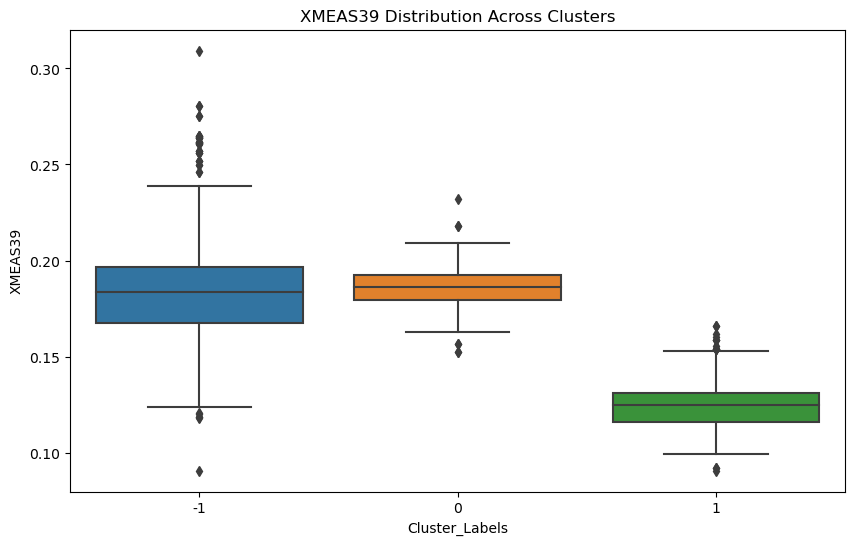

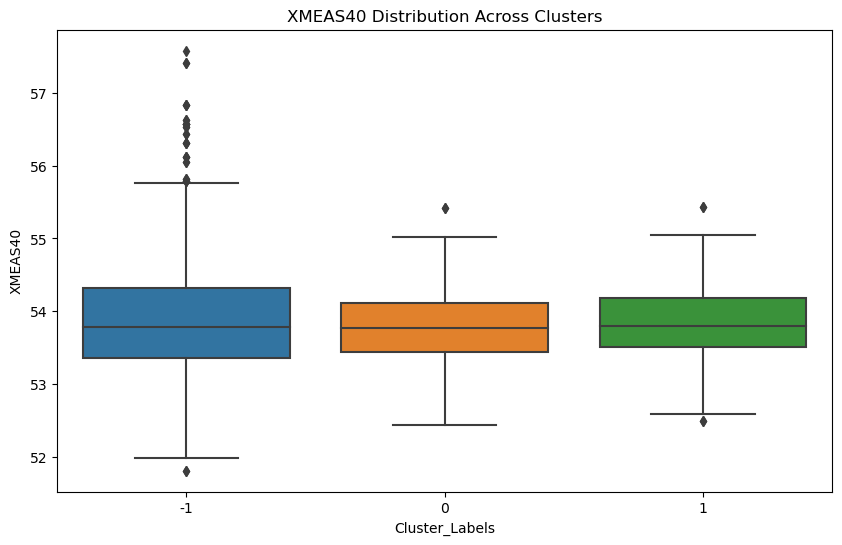

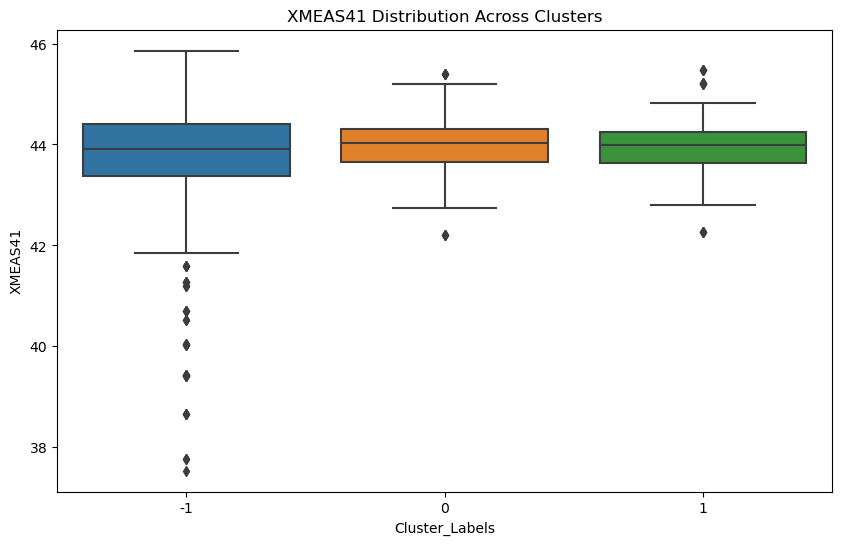

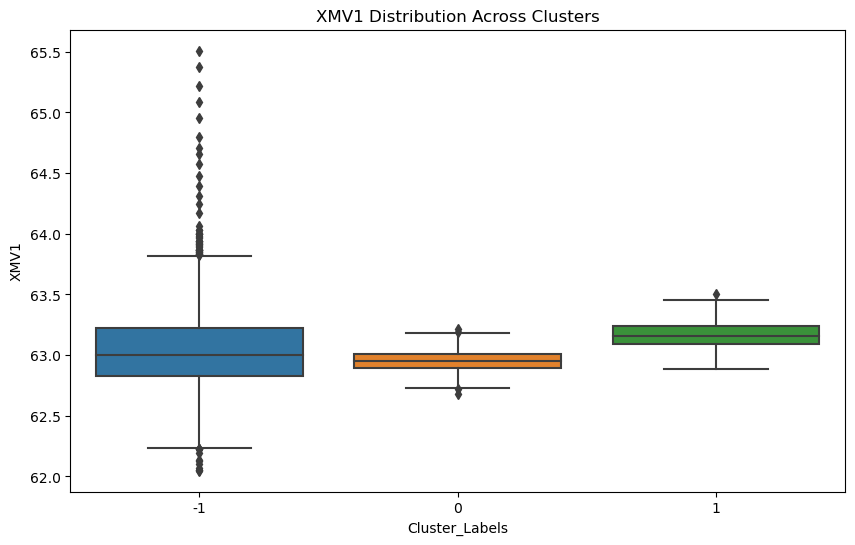

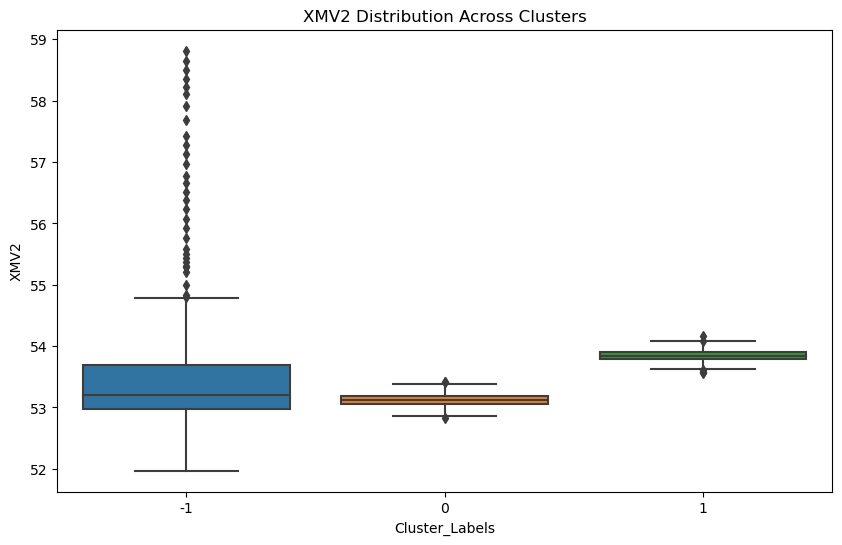

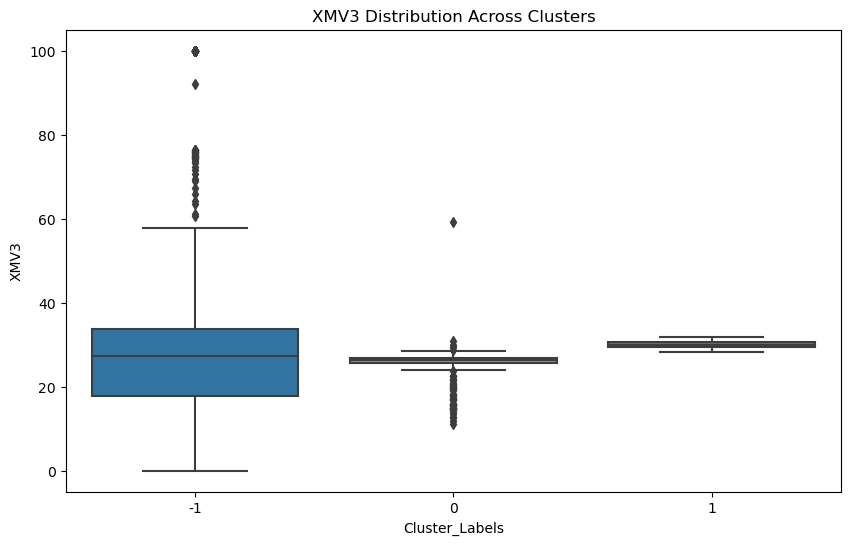

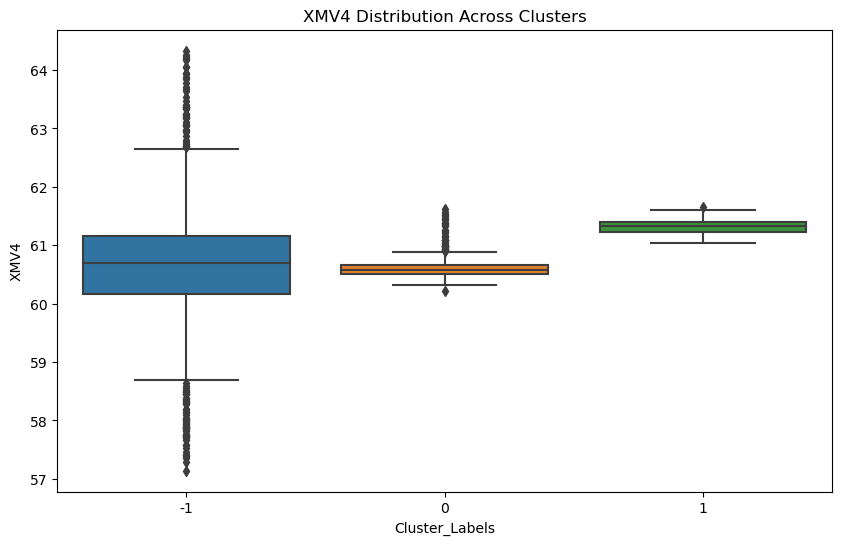

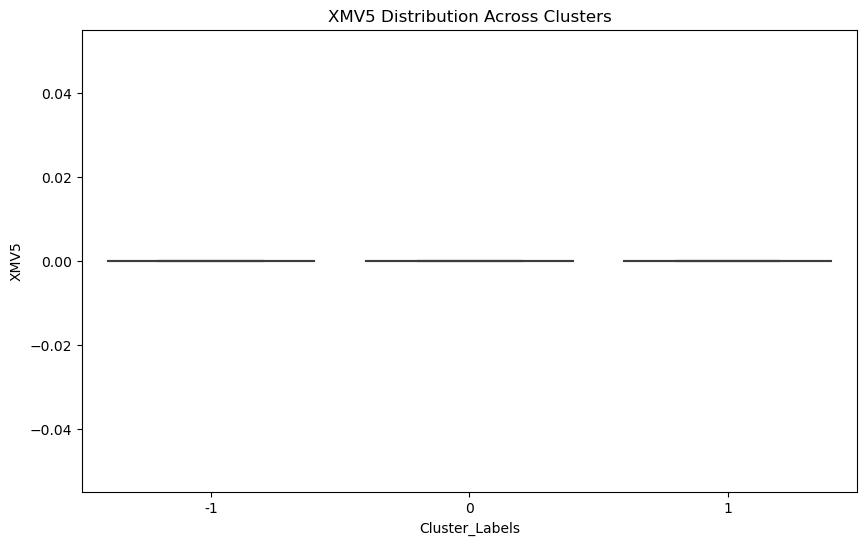

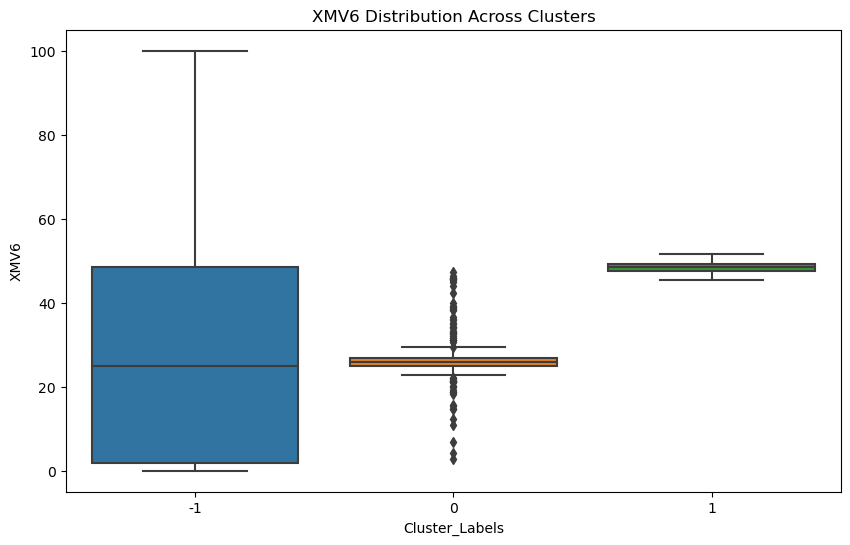

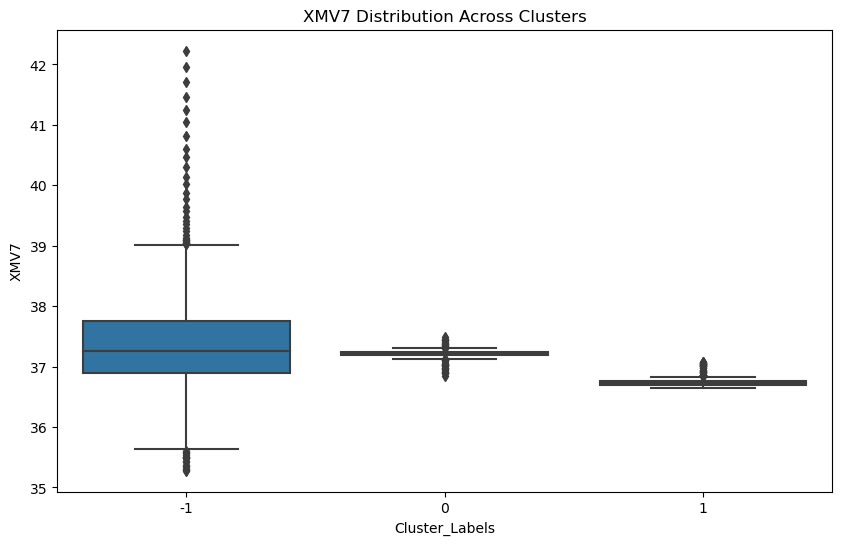

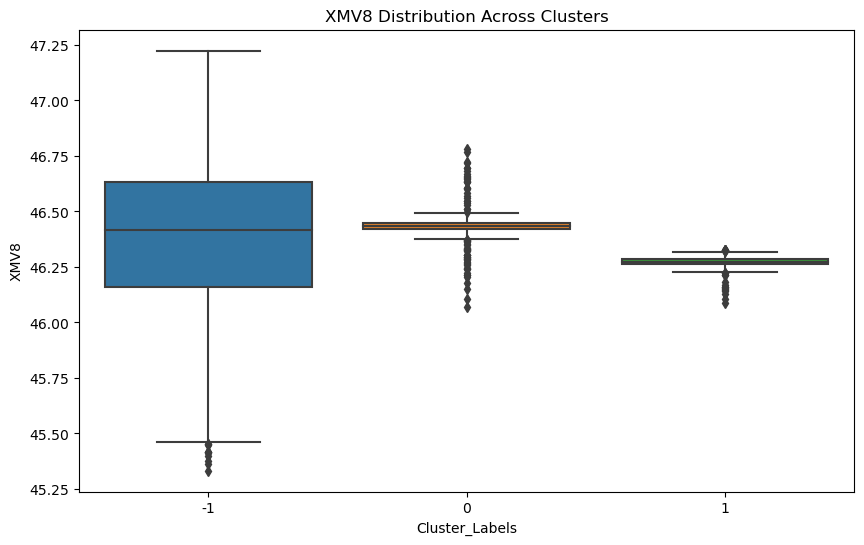

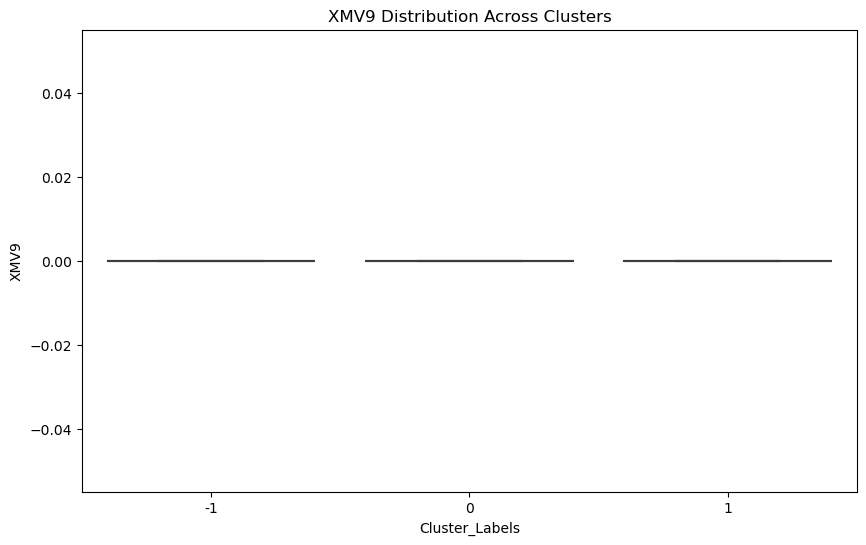

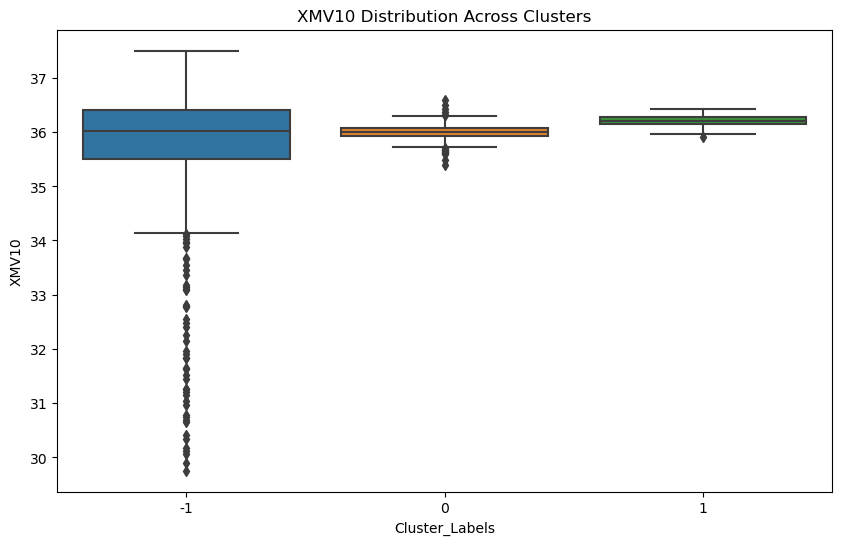

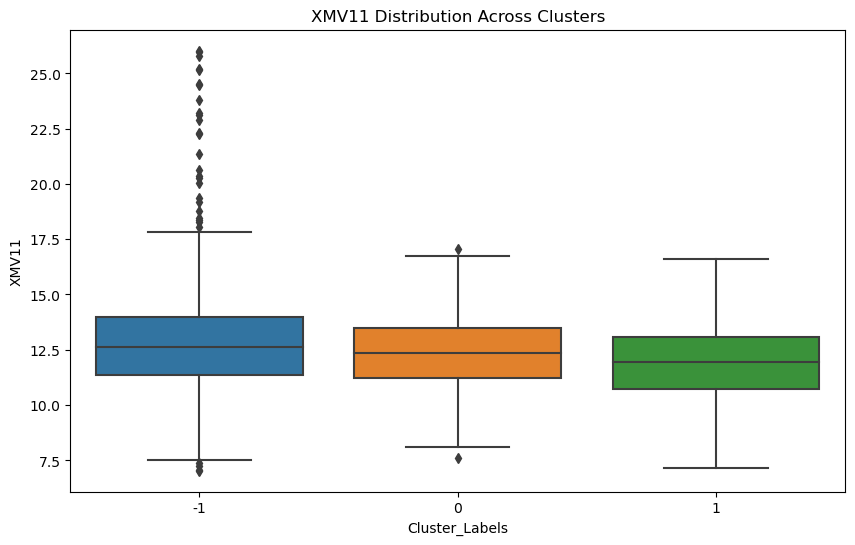

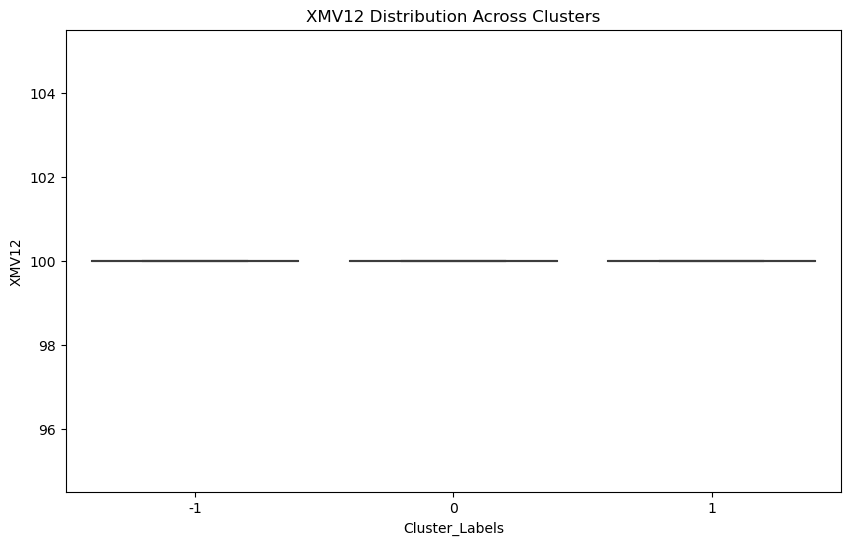

In [12]:
# Plot cluster profiles
for feature in datafile.columns:
    if feature != 'Cluster_Labels':
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster_Labels', y=feature, data=datafile)
        plt.title(f'{feature} Distribution Across Clusters')
        plt.show()

Silhouette Score: 0.10199884559211227


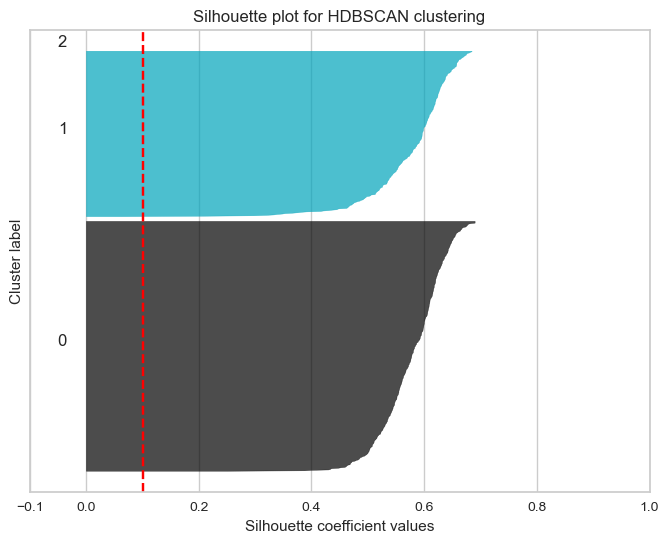

In [14]:
from sklearn.metrics import silhouette_samples
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import numpy as np

# Assuming 'X_pca' and 'cluster_labels' are already computed

# Compute silhouette scores
silhouette_avg = silhouette_score(X_pca, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Compute individual silhouette scores for each sample
sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

# Create a subplot with 1 row and 2 columns
fig, ax1 = plt.subplots(1, 1, figsize=(8, 6))

y_lower = 10
for i in range(len(np.unique(cluster_labels))):
    # Aggregate the silhouette scores for samples belonging to cluster i, and sort them
    ith_cluster_silhouette_values = \
        sample_silhouette_values[cluster_labels == i]

    ith_cluster_silhouette_values.sort()

    size_cluster_i = ith_cluster_silhouette_values.shape[0]
    y_upper = y_lower + size_cluster_i

    color = cm.nipy_spectral(float(i) / len(np.unique(cluster_labels)))
    ax1.fill_betweenx(np.arange(y_lower, y_upper),
                      0, ith_cluster_silhouette_values,
                      facecolor=color, edgecolor=color, alpha=0.7)

    # Label the silhouette plots with their cluster numbers at the middle
    ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

    # Compute the new y_lower for next plot
    y_lower = y_upper + 10  # 10 for the 0 samples

ax1.set_title("Silhouette plot for HDBSCAN clustering")
ax1.set_xlabel("Silhouette coefficient values")
ax1.set_ylabel("Cluster label")

# The vertical line for average silhouette score of all the values
ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

ax1.set_yticks([])  # Clear the yaxis labels / ticks
ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.show()

In [30]:
# Apply K-Means clustering on the PCA-transformed data
kmeans = KMeans(n_clusters=3, random_state=42)
cluster_labels = kmeans.fit_predict(X_pca)

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=8.


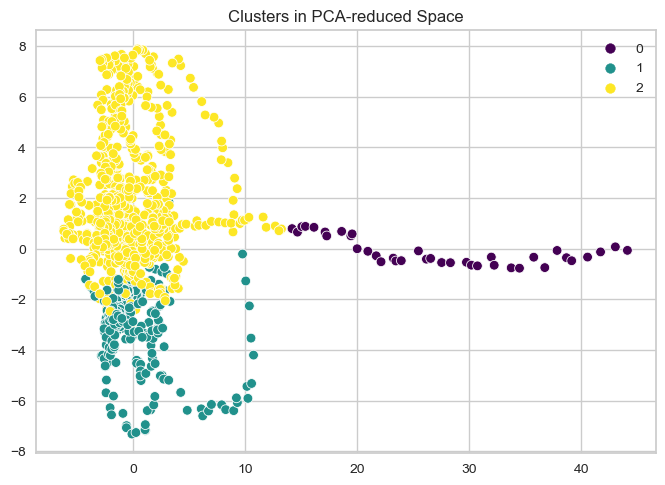

In [31]:
# Visualize the clusters
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis')
plt.title('Clusters in PCA-reduced Space')
plt.show()

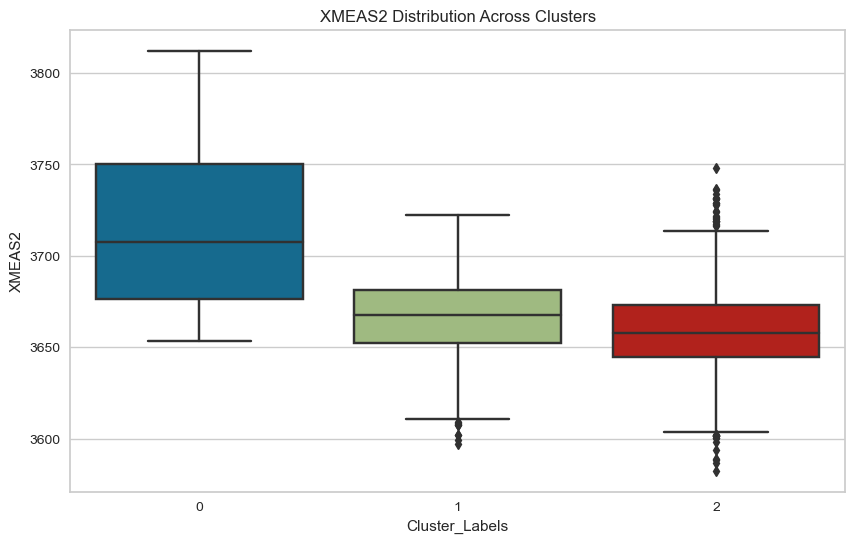

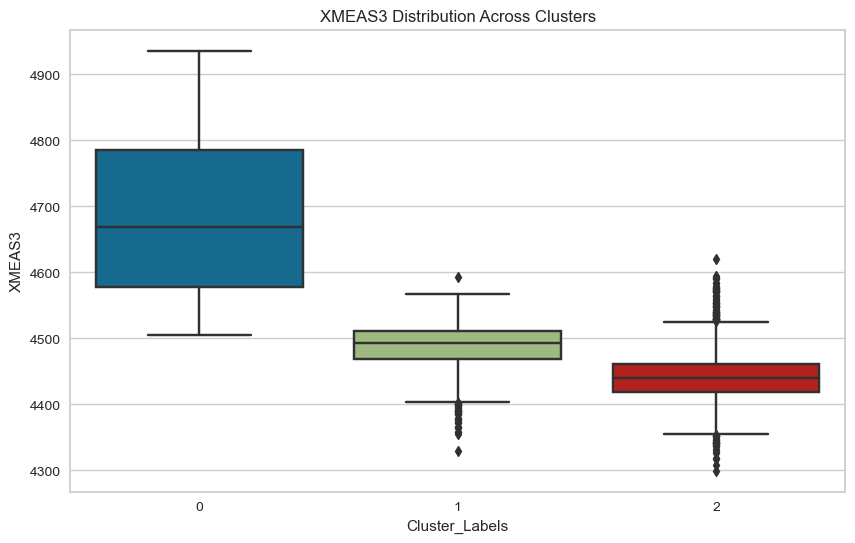

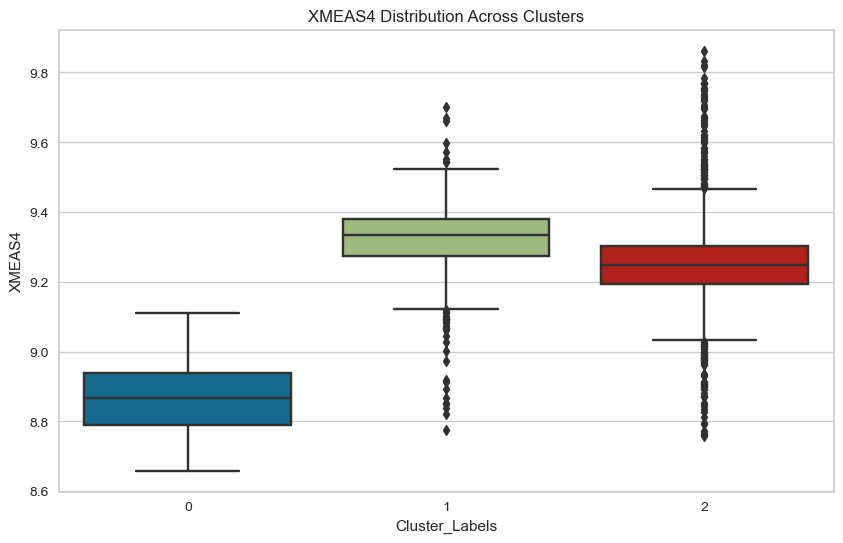

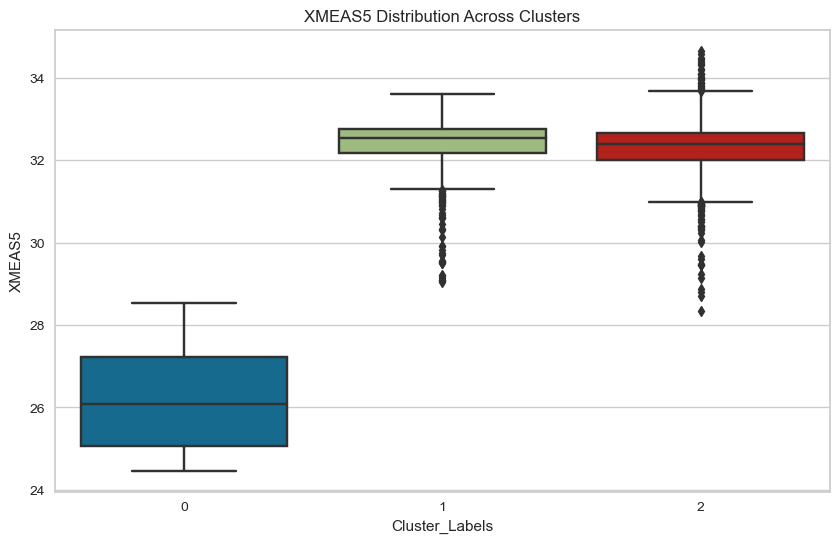

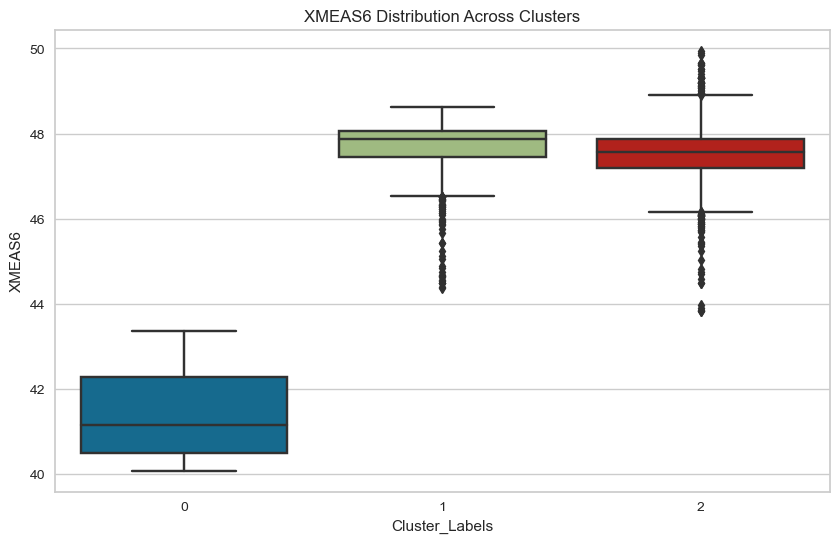

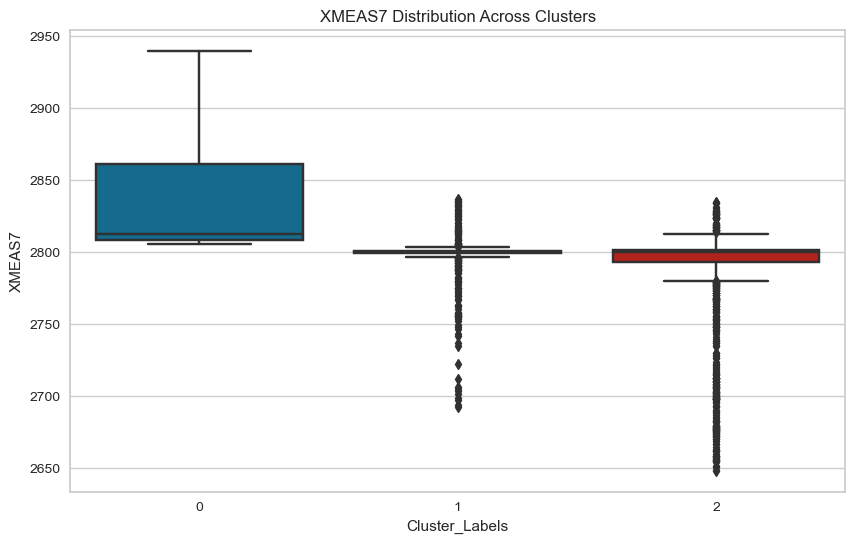

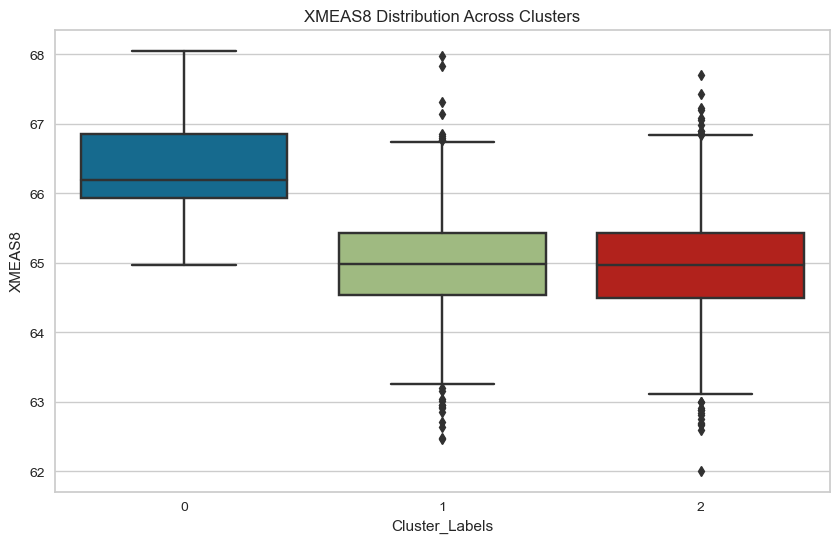

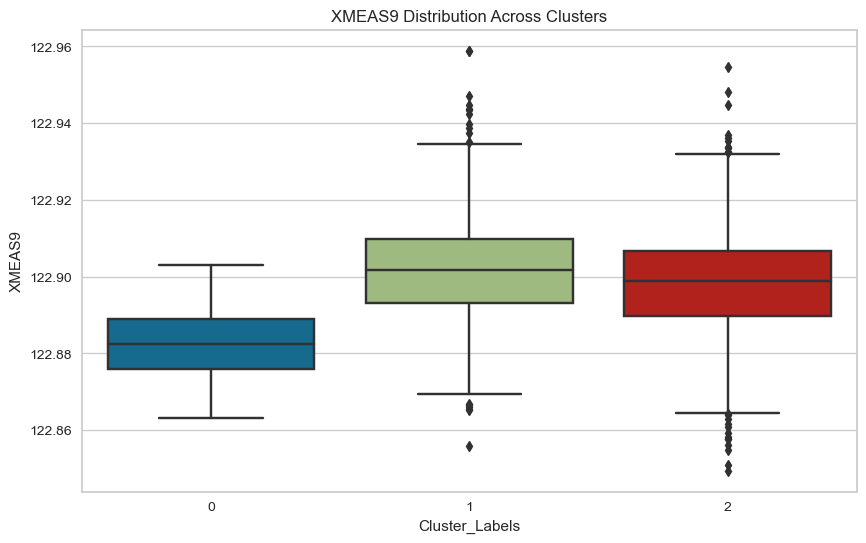

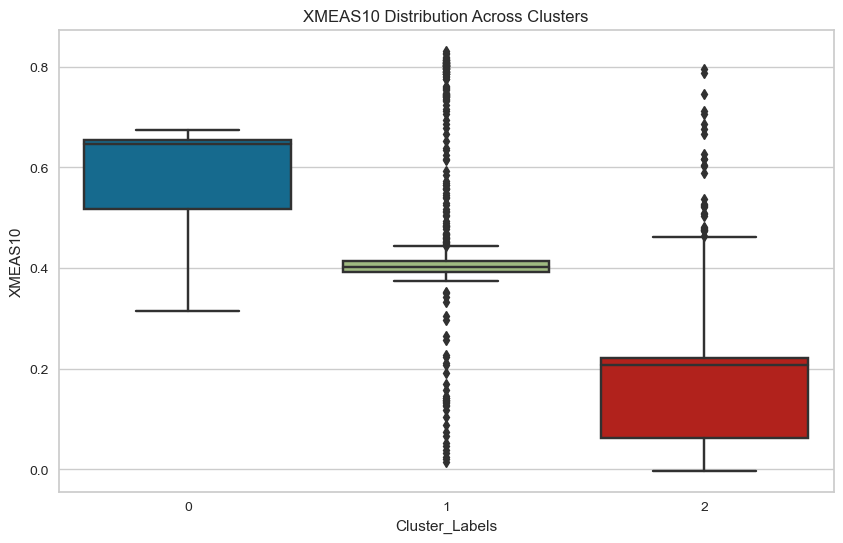

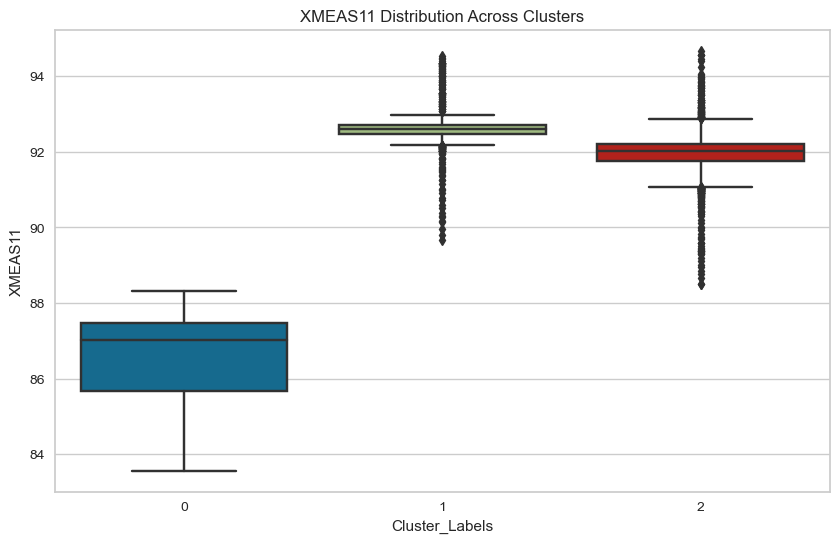

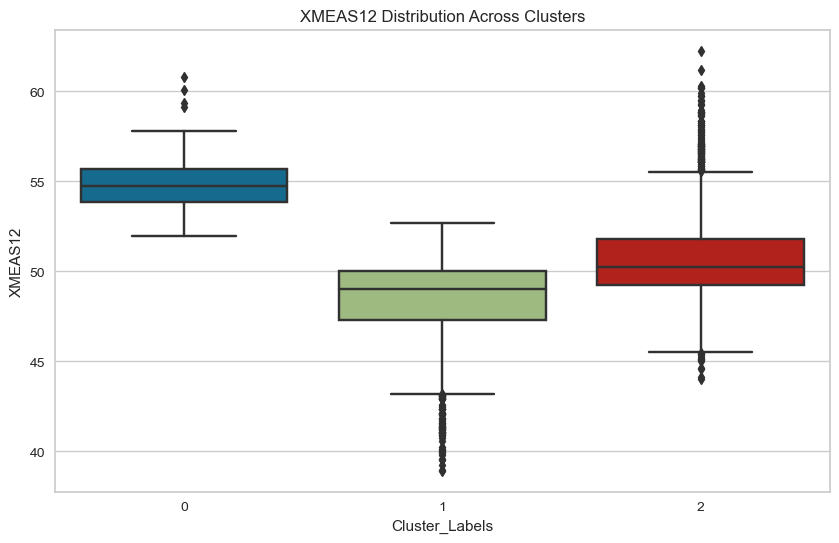

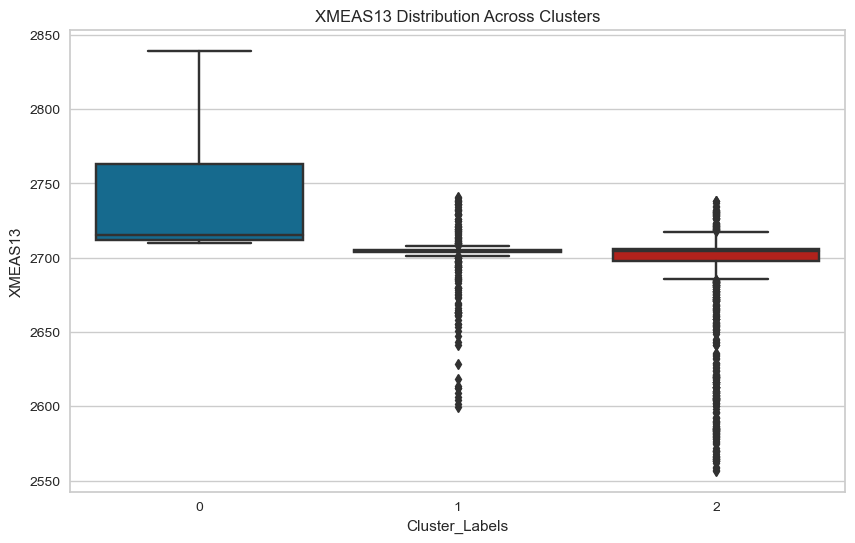

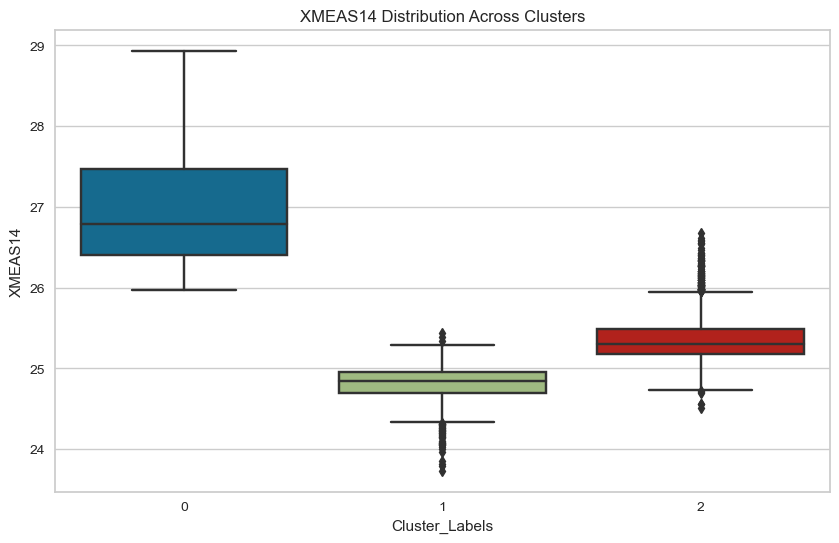

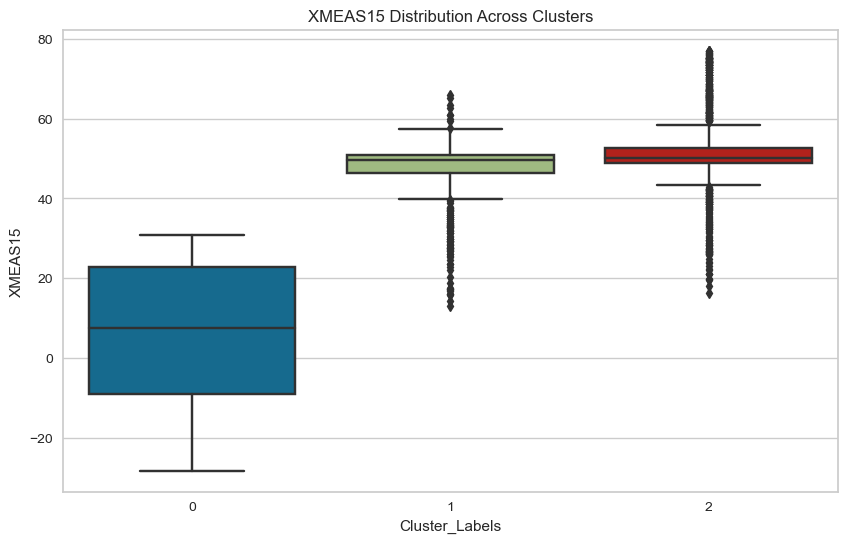

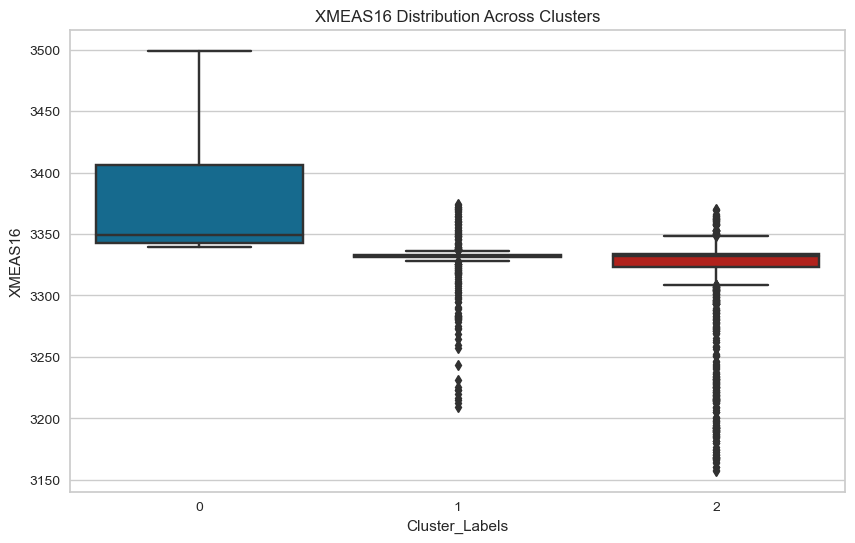

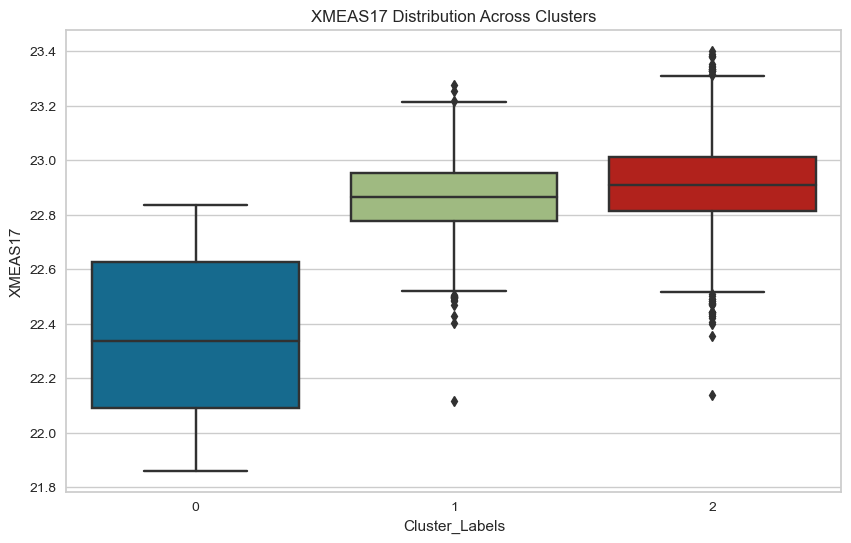

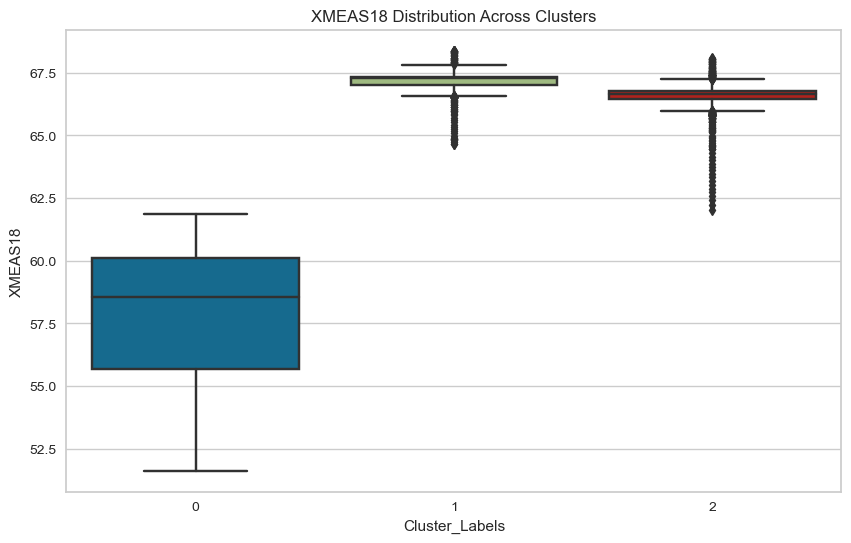

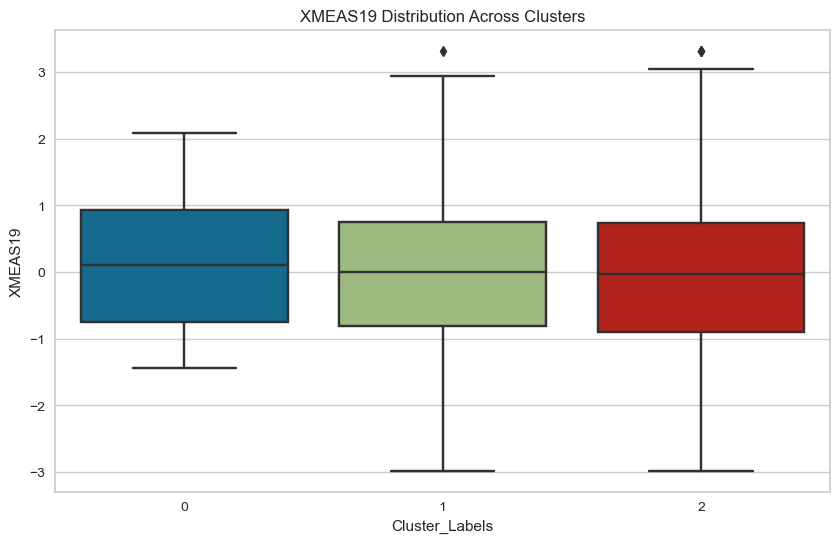

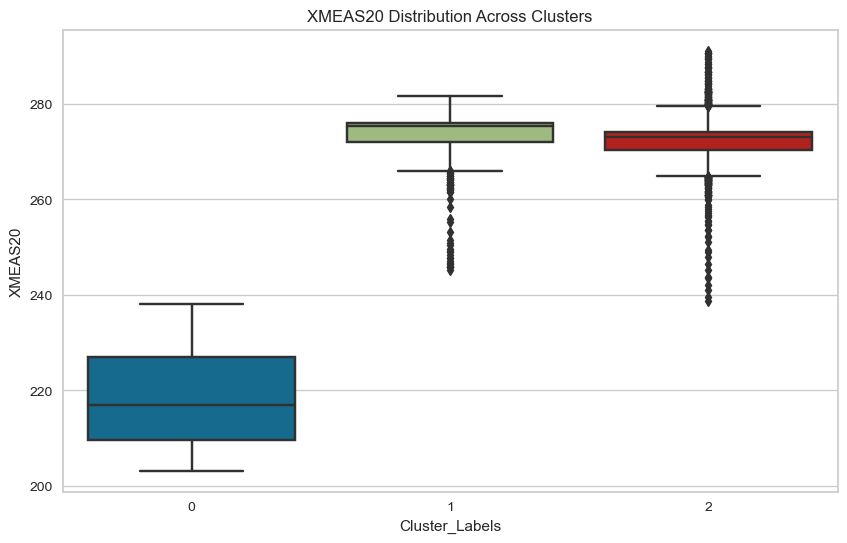

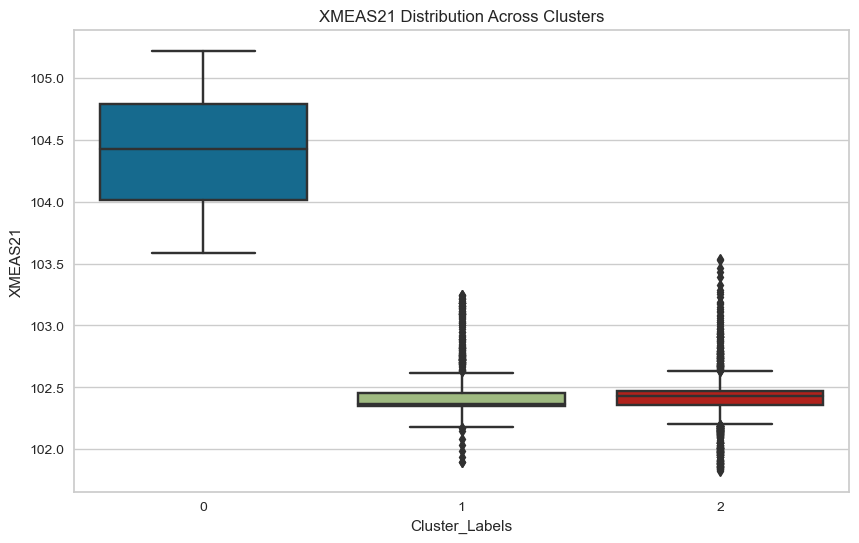

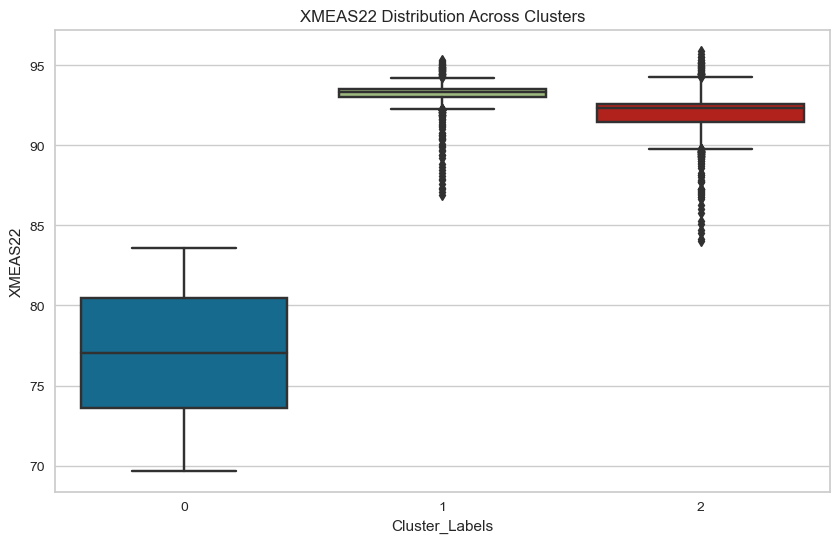

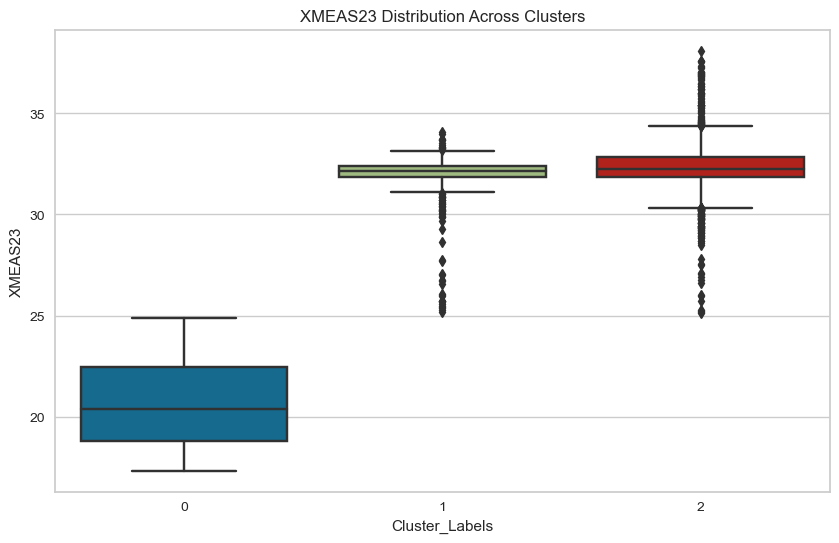

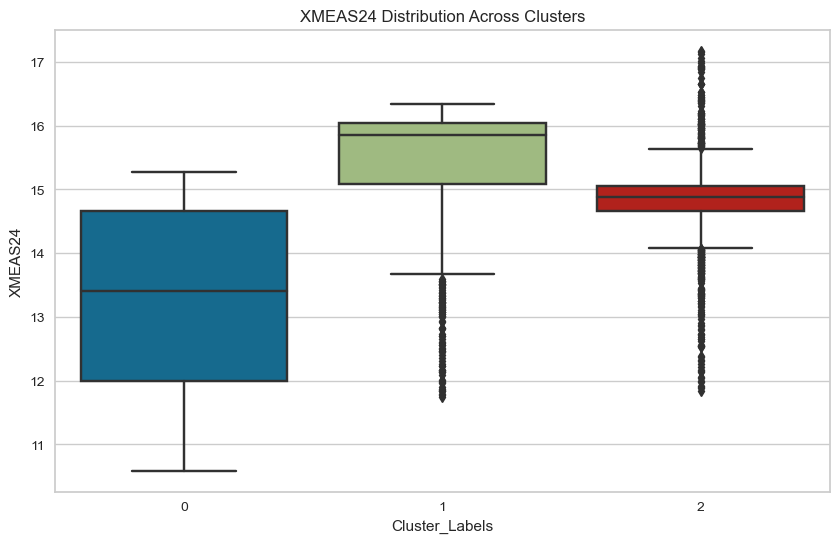

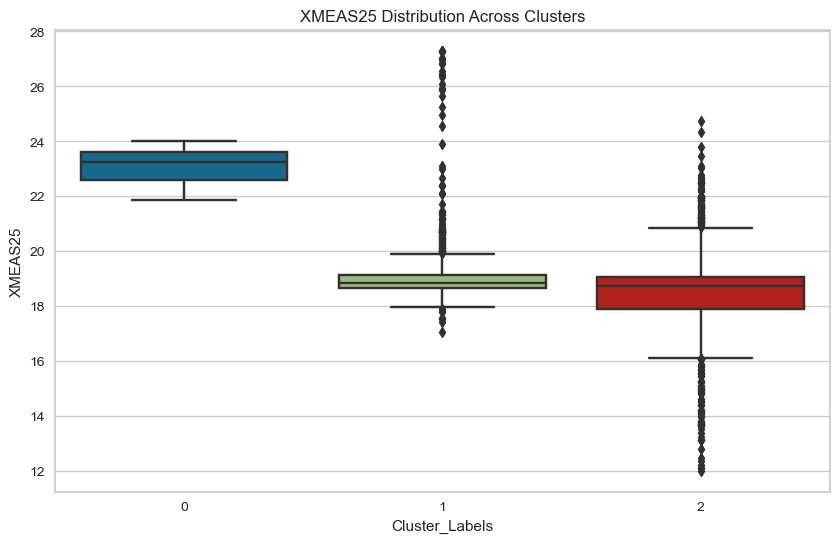

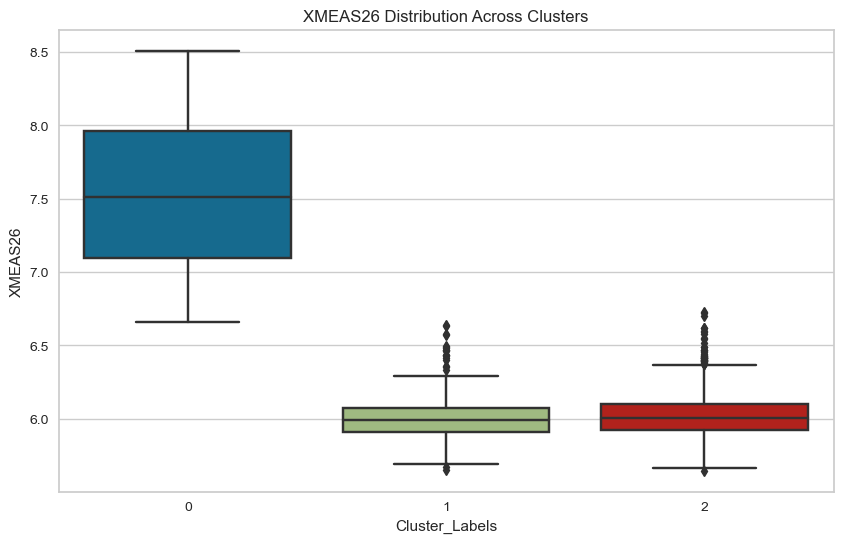

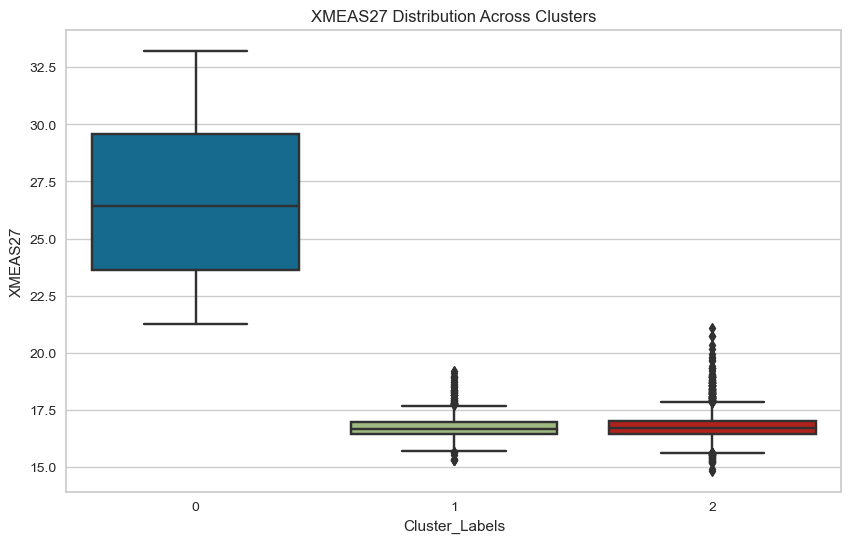

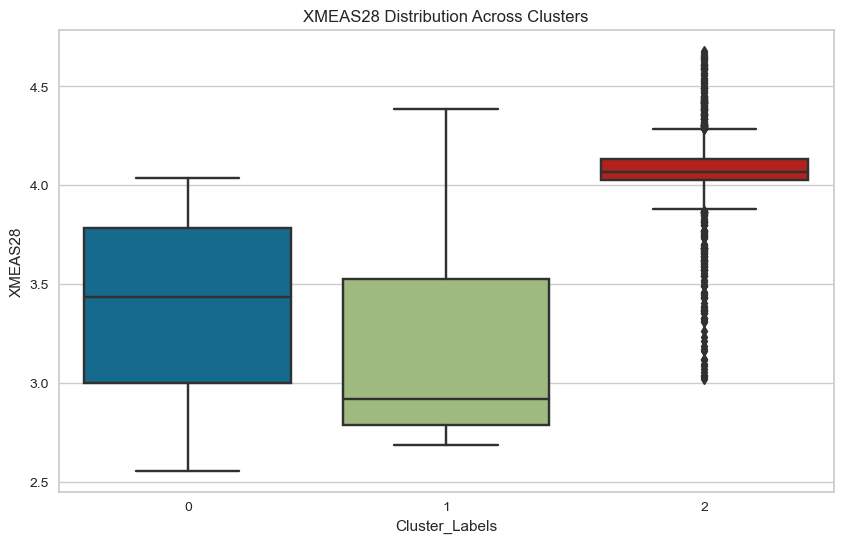

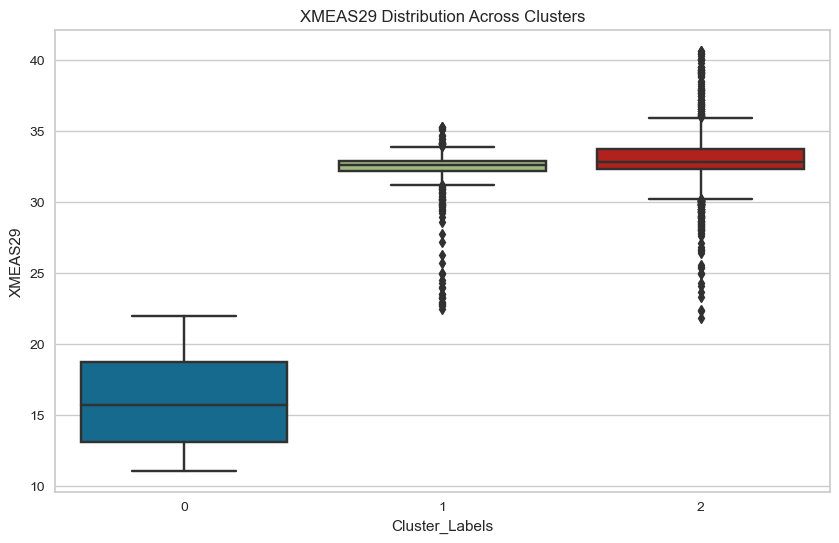

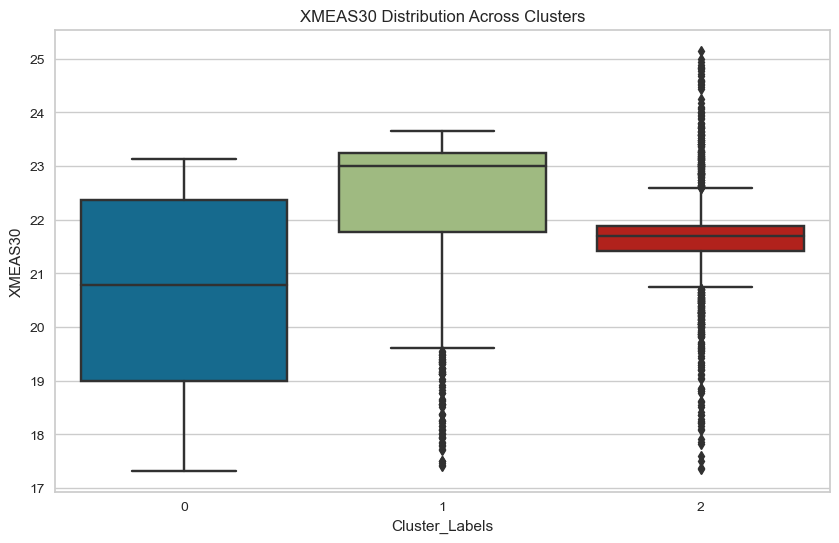

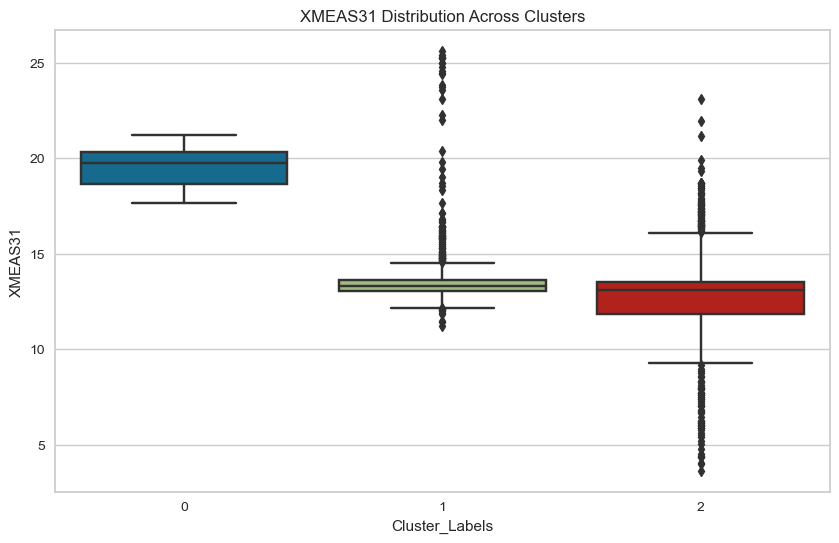

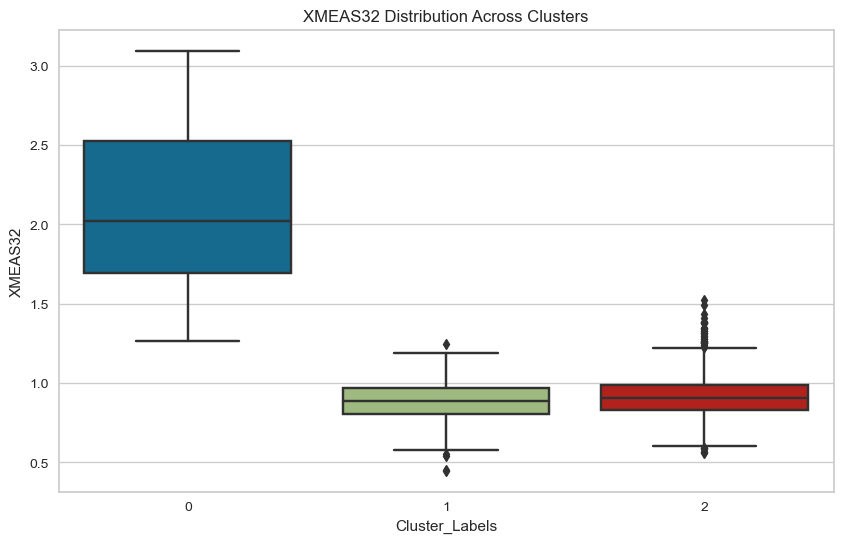

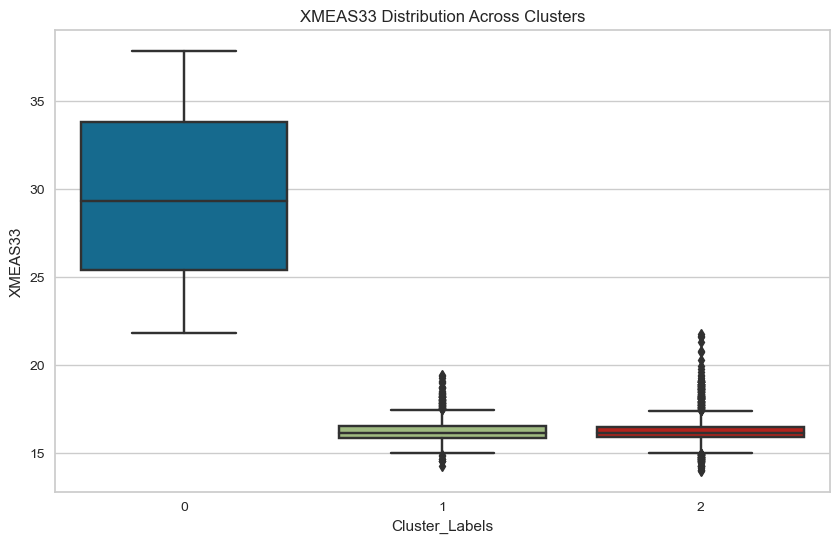

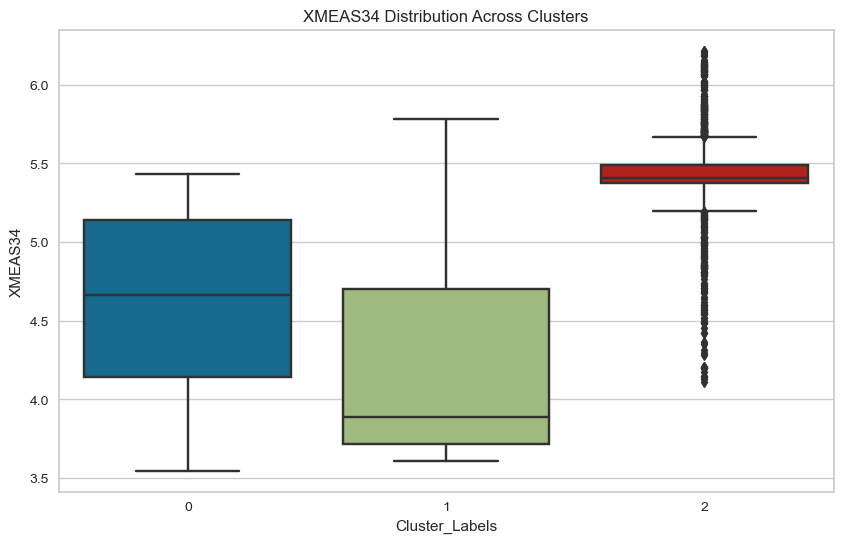

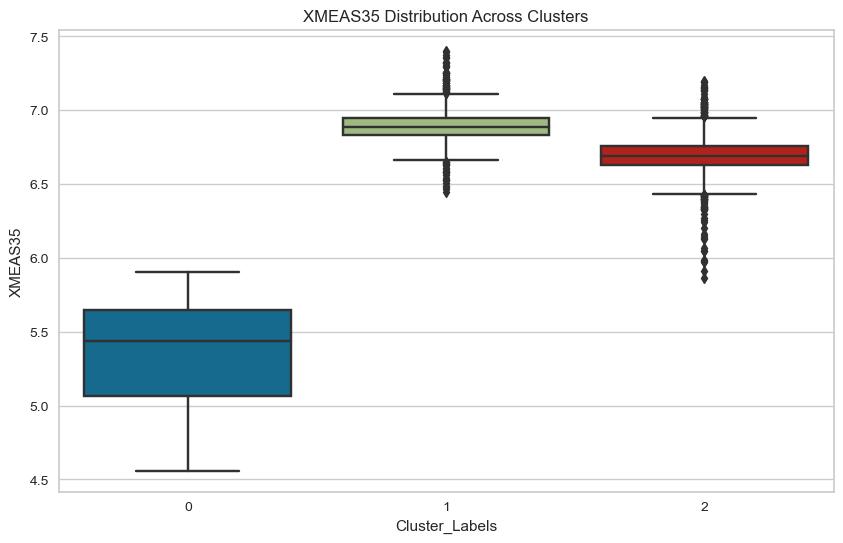

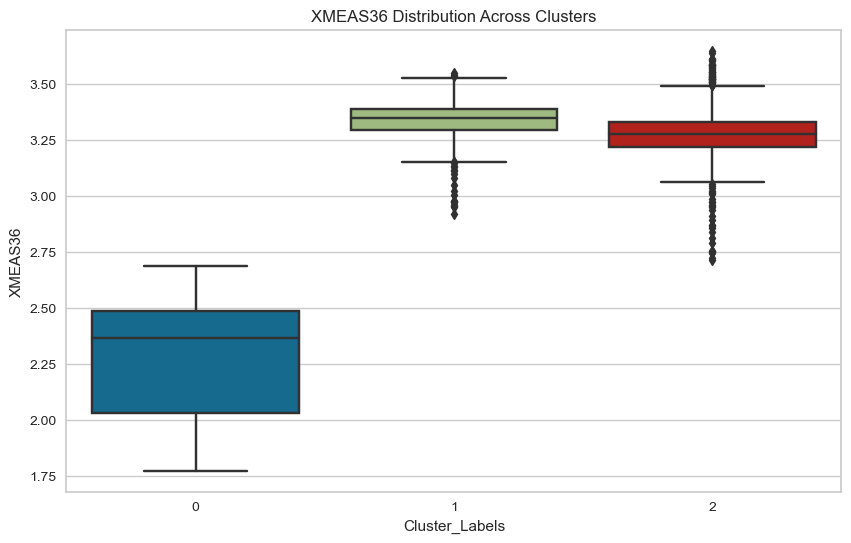

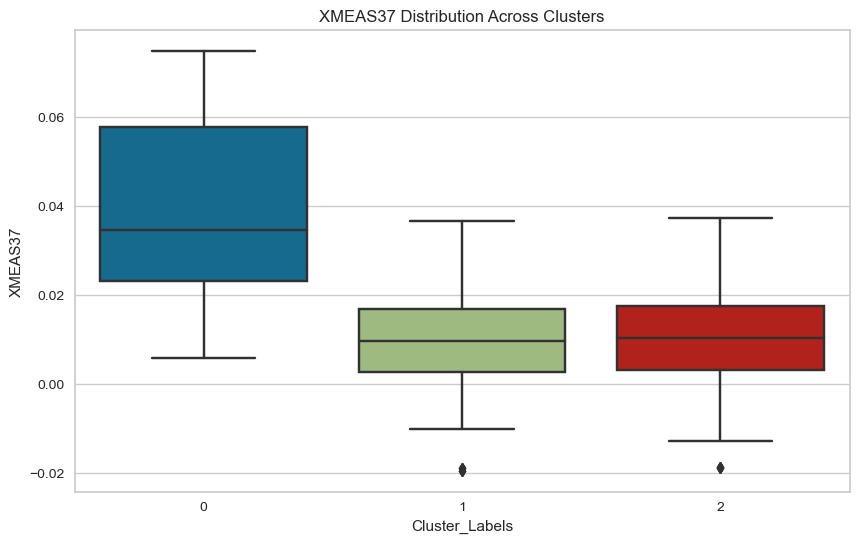

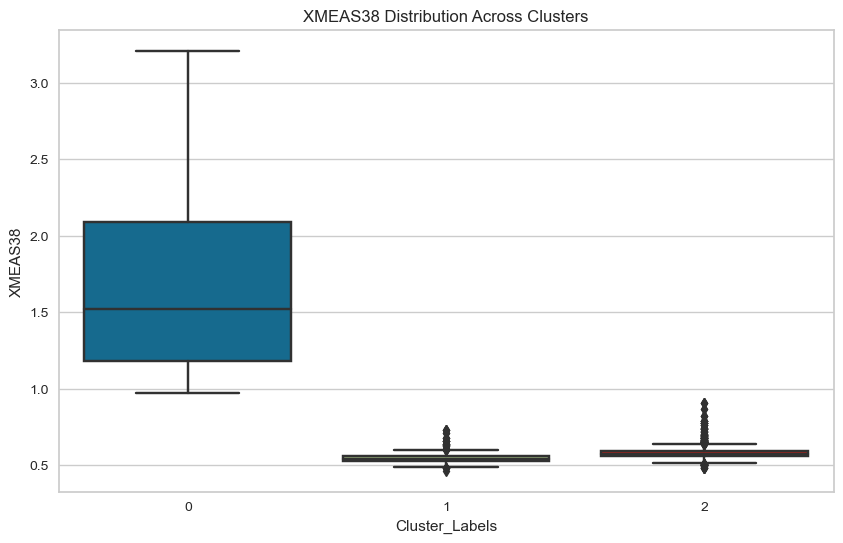

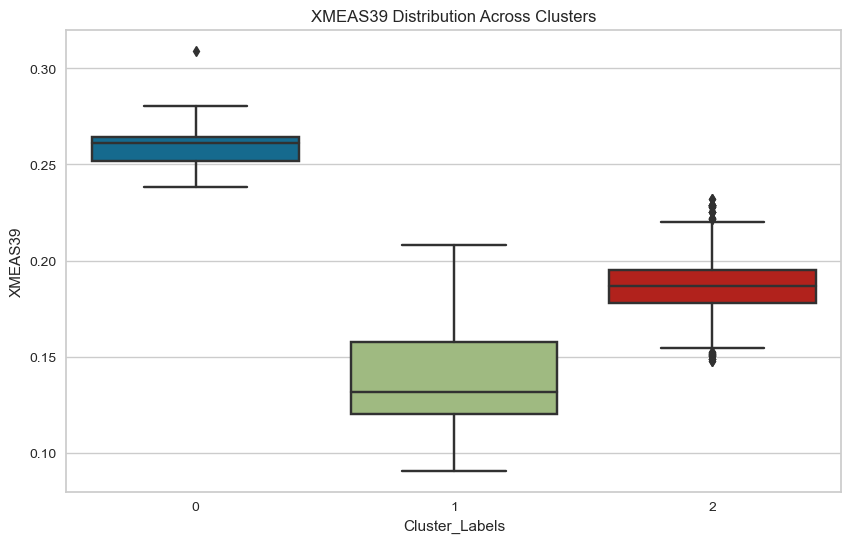

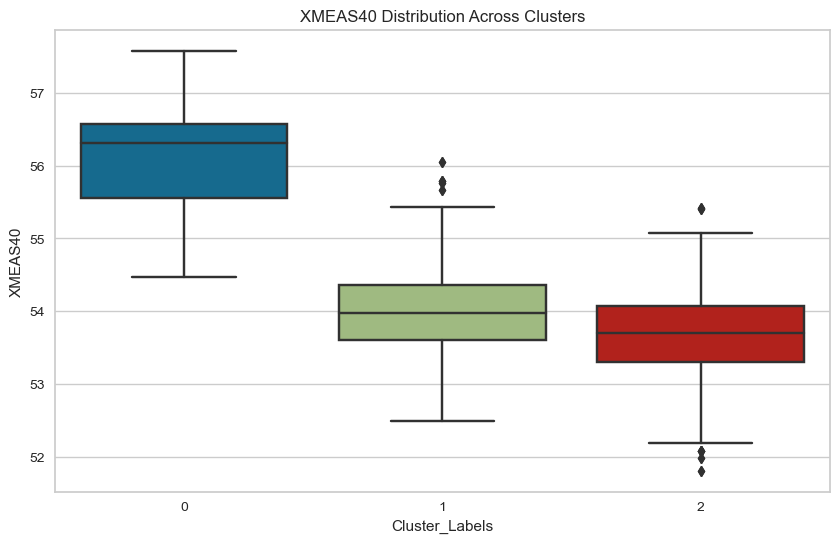

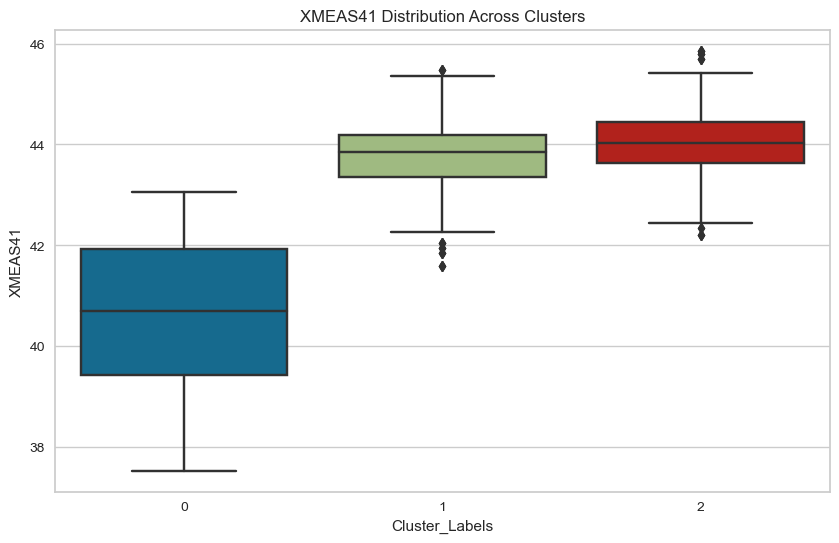

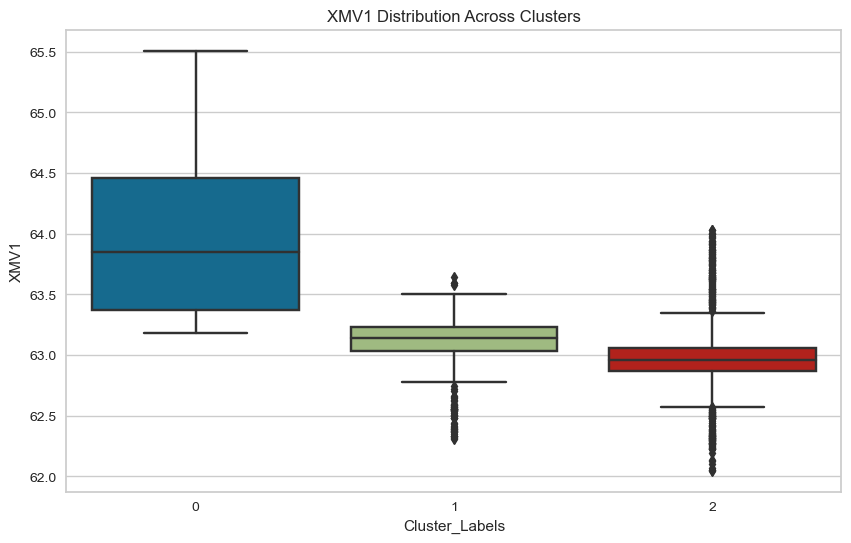

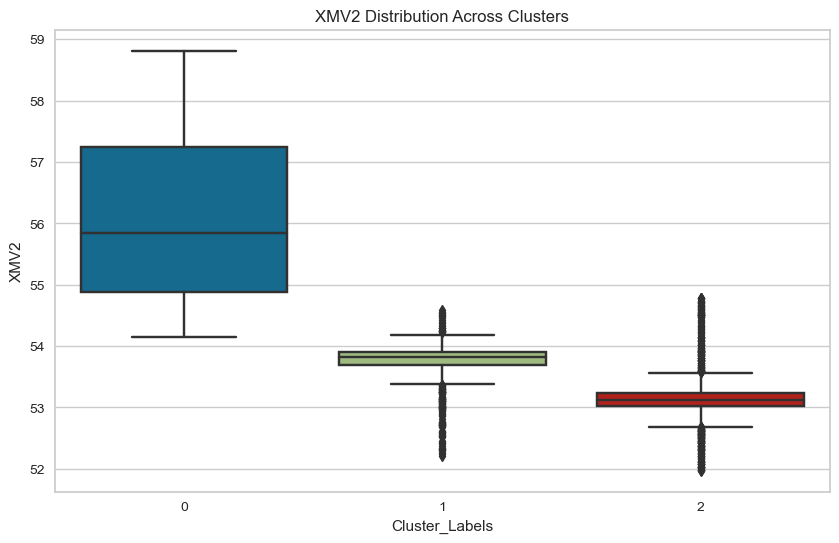

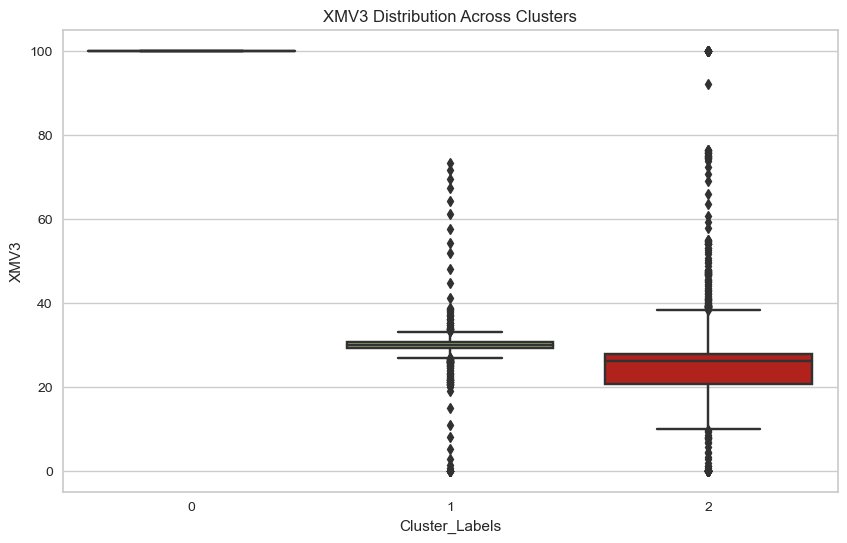

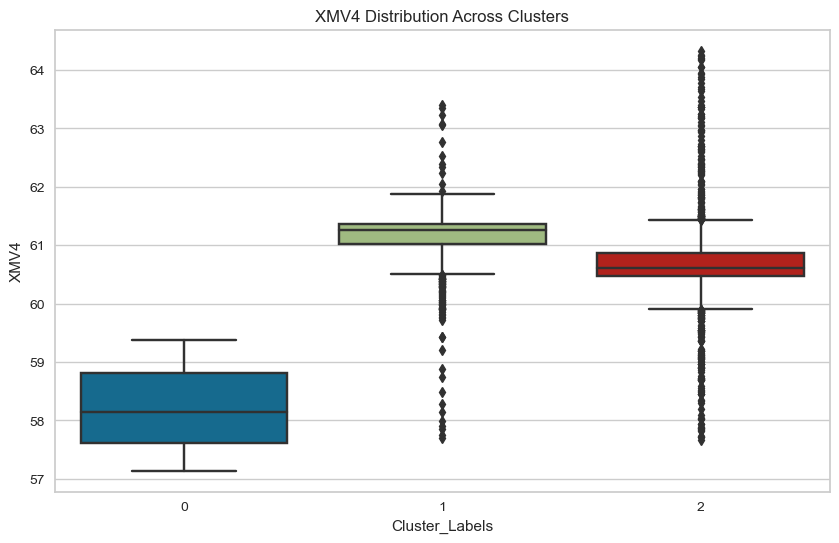

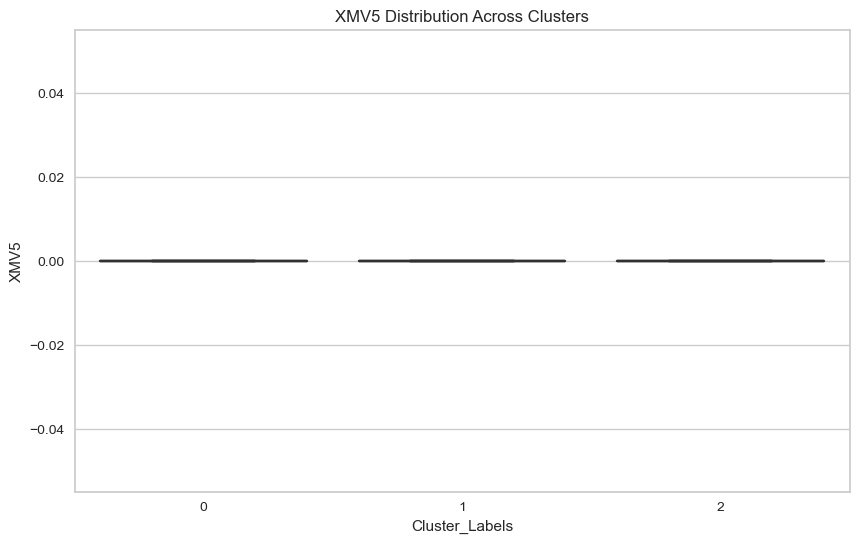

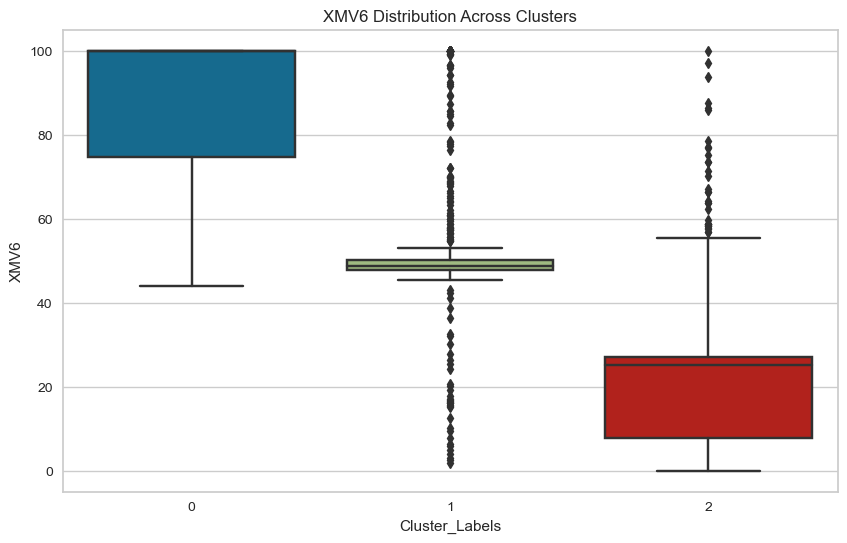

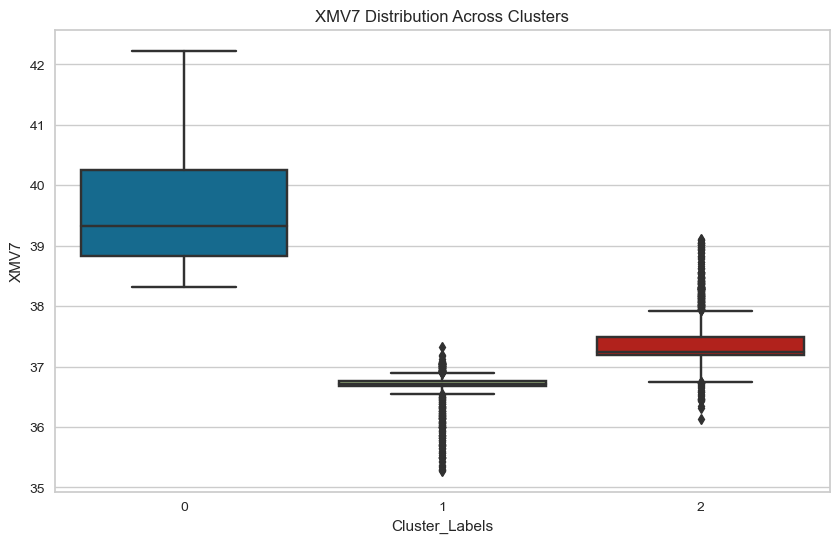

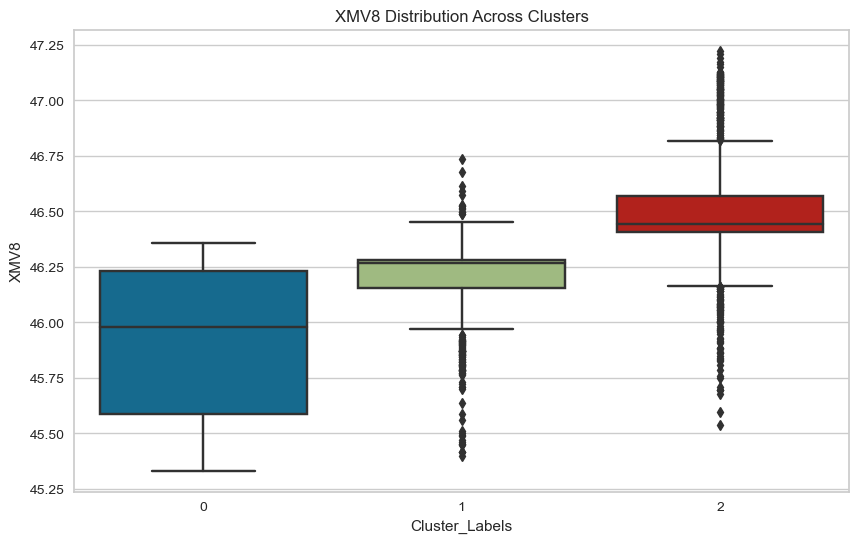

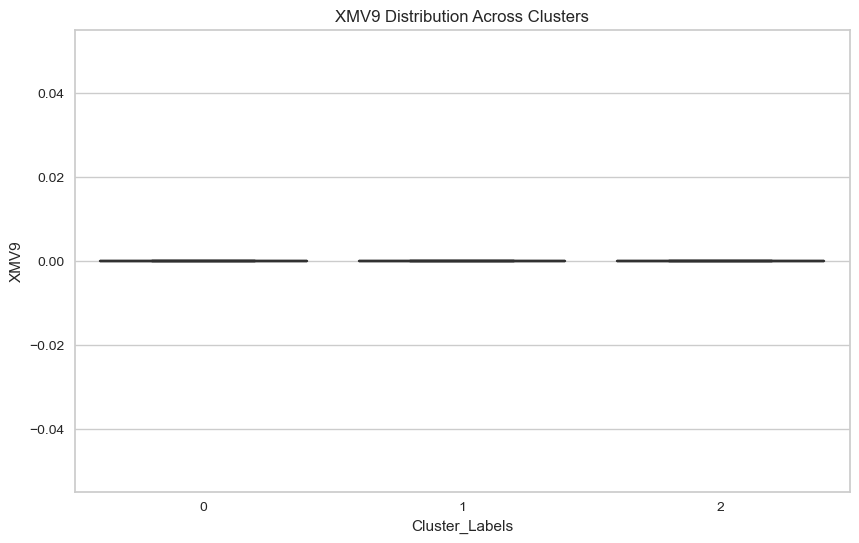

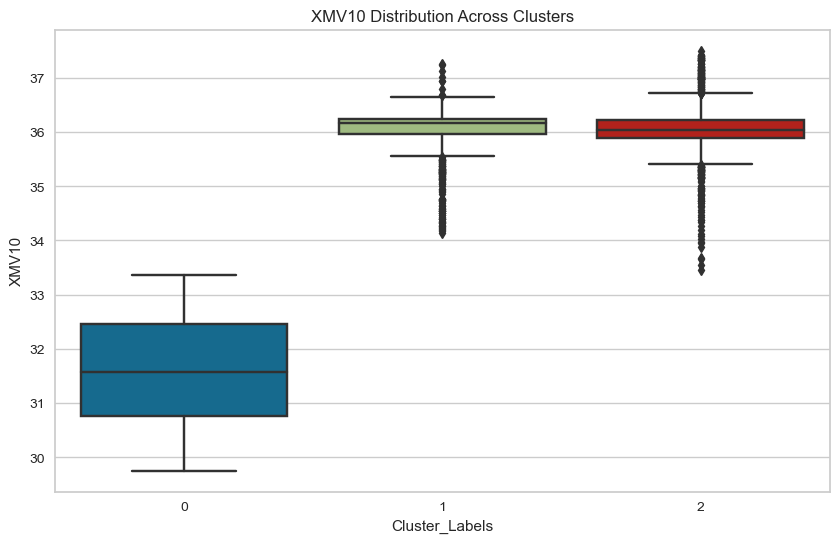

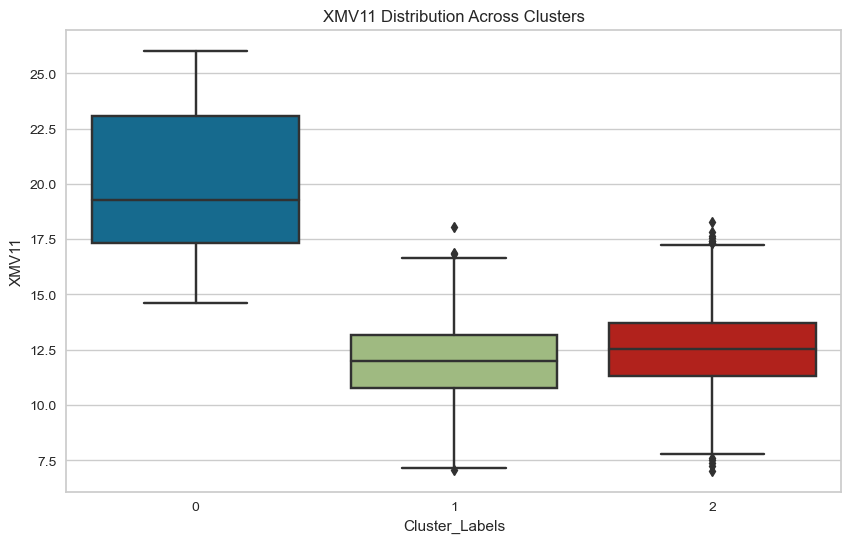

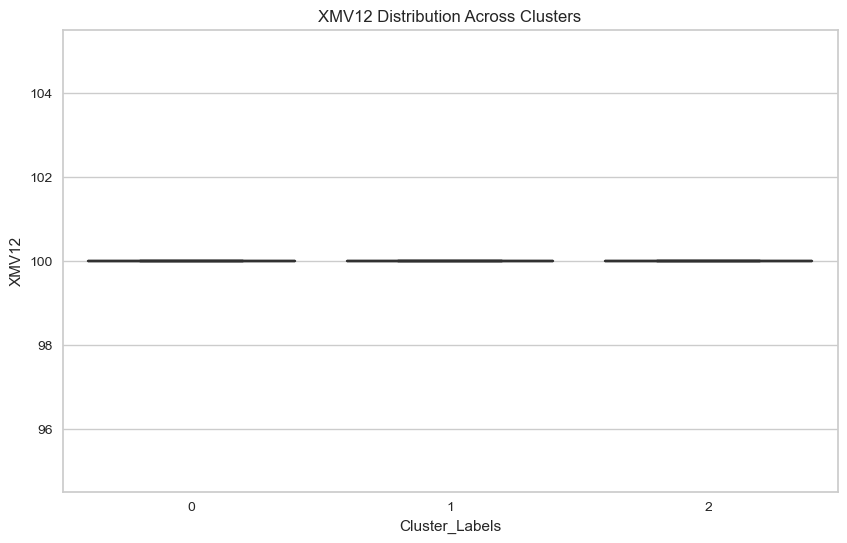

In [32]:
# Add cluster labels to the original DataFrame
datafile['Cluster_Labels'] = cluster_labels

# Plot cluster profiles
for feature in datafile.columns:
    if feature not in ['Cluster_Labels', 'XMEAS1']:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='Cluster_Labels', y=feature, data=datafile)
        plt.title(f'{feature} Distribution Across Clusters')
        plt.show()

In [33]:
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
from sklearn.ensemble import RandomForestClassifier
from yellowbrick.cluster import KElbowVisualizer

# Silhouette Analysis
silhouette_avg = silhouette_score(X_scaled, cluster_labels)
print(f"Silhouette Score: {silhouette_avg}")

# Visualize Silhouette scores
visualizer = SilhouetteVisualizer(kmeans, colors='yellowbrick')
visualizer.fit(X_scaled)
visualizer.show()

# Gap Statistics
visualizer_gap = KElbowVisualizer(
    KMeans(random_state=42), k=(2, 10), metric='gap', timings=False
)
visualizer_gap.fit(X_scaled)
visualizer_gap.show()

# Random Forest Feature Importance
# Assuming 'cluster_labels' is already computed from K-Means clustering

# Train a random forest classifier
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_scaled, cluster_labels)

# Feature importance scores
feature_importance = rf_model.feature_importances_

# Visualize feature importance
plt.figure(figsize=(12, 6))
sns.barplot(x=feature_importance, y=datafile.drop(columns=['XMEAS1']).columns)
plt.title('Random Forest Feature Importance')
plt.show()

Silhouette Score: 0.20028549745826402


ValueError: X has 52 features, but KMeans is expecting 10 features as input.